# EDA Market Basket Analysis


In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading the dataset
tn=pd.read_csv("Sample_data (1).csv")
tn.head()

C:\Users\kumar\AppData\Local\Temp\ipykernel_8588\1443848526.py:1: DtypeWarning: Columns (21,27,33,55) have mixed types. Specify dtype option on import or set low_memory=False.
  tn=pd.read_csv("Sample_data (1).csv")


,Order_Number,Financial_Status,Fulfillment_Status,Fulfilled_at,Currency,Subtotal,Shipping,Taxes,Revenue,Discount_Code,...,Discount_group,Paid_day,month,Lineitem_at_1_rupee,City_from_Tag,Invalid_Order,customer_type,Retail_or_Regular_Order,Segment,New_or_Existing_User
0,#518697,paid,fulfilled,2022-07-21 11:28:24 +0530,INR,983.0,0.0,0.0,983.0,til300jul22y3ic5yy,...,TIL,Tuesday,2022-07,1.0,Gurgaon,Valid,Returning,Retail_Order,NaN,New_User
1,#518697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TIL,Tuesday,2022-07,1.0,Gurgaon,Valid,Returning,Retail_Order,NaN,New_User
2,#518697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TIL,Tuesday,2022-07,1.0,Gurgaon,Valid,Returning,Retail_Order,NaN,New_User
3,#518696,paid,fulfilled,2022-07-19 18:51:18 +0530,INR,805.0,0.0,0.0,805.0,ITCSTOREFB200,...,FACEBOOK,Tuesday,2022-07,1.0,Mumbai,Valid,Returning,Regular_Order,Discount_Seeker,Existing_User
4,#518696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,FACEBOOK,Tuesday,2022-07,1.0,Mumbai,Valid,Returning,Regular_Order,Discount_Seeker,Existing_User


In [3]:
#reading the data set 
pmd=pd.read_excel("Product_Master_data_SKUs_03_08_2023.xlsx")
pmd.head()

,Lineitem name,Lineitem_sku,Division,Category,Brand,Pack Type,Product Mapping,Launch Date,Grammage Change Date,New Grammage
0,Brand_1_product_1,FDM100404,FOODS,Category_8,Brand-1,100 GM,REGULAR,2021-10-01,NaN,NaN
1,Brand_1_product_2,FDM100400,FOODS,Category_8,Brand-1,200 GM,REGULAR,2021-10-01,NaN,NaN
2,Brand_1_product_3,FDM100401,FOODS,Category_8,Brand-1,400 GM,REGULAR,2021-10-01,NaN,NaN
3,Brand_1_product_4,FDM100421,FOODS,Category_8,Brand-1,400 GM,REGULAR,2021-10-01,NaN,NaN
4,Brand_1_product_5,FDM100420,FOODS,Category_8,Brand-1,85 GM,REGULAR,2021-10-01,NaN,NaN


In [4]:
#checking the data shape
print(tn.shape)
print(pmd.shape)

(1432042, 80)
(1945, 10)


In [5]:
#info 
print(pmd.info())
print(tn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Lineitem name         1945 non-null   object        
 1   Lineitem_sku          1945 non-null   object        
 2   Division              1945 non-null   object        
 3   Category              1945 non-null   object        
 4   Brand                 1945 non-null   object        
 5   Pack Type             1764 non-null   object        
 6   Product Mapping       1945 non-null   object        
 7   Launch Date           1945 non-null   datetime64[ns]
 8   Grammage Change Date  10 non-null     object        
 9   New Grammage          9 non-null      object        
dtypes: datetime64[ns](1), object(9)
memory usage: 152.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432042 entries, 0 to 1432041
Data columns (total 80 columns):
 #   Column       

In [6]:
#removing invalid orders from transaction data
invalid_order=tn[tn['Invalid_Order']=='Invalid'].index
tn.drop(invalid_order , inplace=True)
tn.head()

,Order_Number,Financial_Status,Fulfillment_Status,Fulfilled_at,Currency,Subtotal,Shipping,Taxes,Revenue,Discount_Code,...,Discount_group,Paid_day,month,Lineitem_at_1_rupee,City_from_Tag,Invalid_Order,customer_type,Retail_or_Regular_Order,Segment,New_or_Existing_User
0,#518697,paid,fulfilled,2022-07-21 11:28:24 +0530,INR,983.0,0.0,0.0,983.0,til300jul22y3ic5yy,...,TIL,Tuesday,2022-07,1.0,Gurgaon,Valid,Returning,Retail_Order,NaN,New_User
1,#518697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TIL,Tuesday,2022-07,1.0,Gurgaon,Valid,Returning,Retail_Order,NaN,New_User
2,#518697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TIL,Tuesday,2022-07,1.0,Gurgaon,Valid,Returning,Retail_Order,NaN,New_User
3,#518696,paid,fulfilled,2022-07-19 18:51:18 +0530,INR,805.0,0.0,0.0,805.0,ITCSTOREFB200,...,FACEBOOK,Tuesday,2022-07,1.0,Mumbai,Valid,Returning,Regular_Order,Discount_Seeker,Existing_User
4,#518696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,FACEBOOK,Tuesday,2022-07,1.0,Mumbai,Valid,Returning,Regular_Order,Discount_Seeker,Existing_User


In [8]:
#knowing the types under each columns
print(pmd['Division'].unique())
print(pmd['Division'].nunique())
print(pmd['Category'].unique())
print(pmd['Category'].nunique())
print(pmd['Brand'].unique())
print(pmd['Brand'].nunique())
print(pmd['Pack Type'].unique())
print(pmd['Pack Type'].nunique())
print(pmd['Product Mapping'].unique())
print(pmd['Product Mapping'].nunique())

['FOODS' 'X' 'PERSONAL CARE' 'HOTELS' 'MATCHES AND AGARBATTI' 'STATIONERY']
6
['Category_8' 'Category_16' 'Category_25' 'Category_31' 'Category_7'
 'Category_14' 'Category_30' 'Category_5' 'Category_18' 'Category_2'
 'Category_17' 'Category_24' 'Category_27' 'Category_15' 'Category_3'
 'Category_20' 'Category_21' 'Category_19' 'Category_10' 'Category_11'
 'Category_29' 'Category_35' 'Category_13' 'Category_12' 'Category_32'
 'Category_1' 'Category_22' 'Category_26' 'Category_36' 'Category_33'
 'Category_6' 'Category_4' 'Category_23' 'Category_34' 'Category_28'
 'Category_9']
36
['Brand-1' 'Brand-10' 'Brand-11' 'Brand-12' 'Brand-13' 'Brand-14'
 'Brand-15' 'Brand-16' 'Brand-17' 'Brand-18' 'Brand-19' 'Brand-2'
 'Brand-20' 'Brand-21' 'Brand-22' 'Brand-23' 'Brand-24' 'Brand-25'
 'Brand-26' 'Brand-27' 'Brand-28' 'Brand-29' 'Brand-3' 'Brand-30'
 'Brand-31' 'Brand-32' 'Brand-33' 'Brand-34' 'Brand-35' 'Brand-36'
 'Brand-37' 'Brand-38' 'Brand-39' 'Brand-4' 'Brand-40' 'Brand-41'
 'Brand-42' 'Bran

In [14]:
#merging the data
merged_data=pd.merge(tn,pmd,how='left',on='Lineitem_sku')
merged_data.head()

,Order_Number,Financial_Status,Fulfillment_Status,Fulfilled_at,Currency,Subtotal,Shipping,Taxes,Revenue,Discount_Code,...,New_or_Existing_User,Lineitem name,Division,Category,Brand,Pack Type,Product Mapping,Launch Date,Grammage Change Date,New Grammage
0,#518697,paid,fulfilled,2022-07-21 11:28:24 +0530,INR,983.0,0.0,0.0,983.0,til300jul22y3ic5yy,...,New_User,Brand_37_product_116,FOODS,Category_4,Brand-37,28.2 GM,REGULAR,2022-04-01,NaN,NaN
1,#518697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,New_User,Brand_1_product_124,FOODS,Category_31,Brand-1,5KG,REGULAR,2021-10-01,NaN,NaN
2,#518697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,New_User,Brand_1_product_119,FOODS,Category_31,Brand-1,10 KG,REGULAR,2021-10-01,NaN,NaN
3,#518696,paid,fulfilled,2022-07-19 18:51:18 +0530,INR,805.0,0.0,0.0,805.0,ITCSTOREFB200,...,Existing_User,Brand_37_product_116,FOODS,Category_4,Brand-37,28.2 GM,REGULAR,2022-04-01,NaN,NaN
4,#518696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Existing_User,Brand_20_product_2,MATCHES AND AGARBATTI,Category_21,Brand-20,1 PCS,REGULAR,2021-10-01,NaN,NaN


# Data Cleaning

In [15]:
#removing unnecessary columns
merged_data.drop(['Financial_Status'],axis=1,inplace=True)
merged_data.drop(['Fulfillment_Status'],axis=1,inplace=True)
merged_data.drop(['Fulfilled_at'],axis=1,inplace=True)
merged_data.drop(['Currency'],axis=1,inplace=True)
merged_data.drop(['Subtotal'],axis=1,inplace=True)
merged_data.drop(['Shipping'],axis=1,inplace=True)

In [25]:
#removing unnecessary columns
#merged_data.drop(['Taxes'],axis=1,inplace=True)
#merged_data.drop(['Revenue'],axis=1,inplace=True)
#merged_data.drop(['Discount_Code'],axis=1,inplace=True)
#merged_data.drop(['Discount_Amount'],axis=1,inplace=True)
#merged_data.drop(['Lineitem_requires_shipping'],axis=1,inplace=True)
#merged_data.drop(['Lineitem_taxable'],axis=1,inplace=True)
#merged_data.drop(['Lineitem_fulfillment_status'],axis=1,inplace=True)
#merged_data.drop(['Billing_Zip'],axis=1,inplace=True)
#merged_data.drop(['Billing_Province'],axis=1,inplace=True)
#merged_data.drop(['Billing_Country'],axis=1,inplace=True)
#merged_data.drop(['Shipping_City'],axis=1,inplace=True)
#merged_data.drop(['Shipping_Province'],axis=1,inplace=True)
#merged_data.drop(['Shipping_Country'],axis=1,inplace=True)
#merged_data.drop(['Cancelled_at'],axis=1,inplace=True)
merged_data.drop(['Refunded_Amount'],axis=1,inplace=True)
merged_data.drop(['Lineitem_discount'],axis=1,inplace=True)
merged_data.drop(['Billing_Province_Name'],axis=1,inplace=True)
merged_data.drop(['Payment_References'],axis=1,inplace=True)
merged_data.drop(['sale_kind'],axis=1,inplace=True)
merged_data.drop(['marketing_event_target'],axis=1,inplace=True)
merged_data.drop(['utm_campaign_term'],axis=1,inplace=True)


In [41]:
#removing unnecessary columns
#merged_data.drop(['referrer_source'],axis=1,inplace=True)
#merged_data.drop(['referrer_url'],axis=1,inplace=True)
#merged_data.drop(['SKU_MRP'],axis=1,inplace=True)
#merged_data.drop(['SKU_Discount'],axis=1,inplace=True)
#merged_data.drop(['SKU_Discount_%'],axis=1,inplace=True)
#merged_data.drop(['Cart_Discount'],axis=1,inplace=True)
#merged_data.drop(['Coupon_Discount'],axis=1,inplace=True)
#merged_data.drop(['Paid_at'],axis=1,inplace=True)
#merged_data.drop(['Accepts_Marketing'],axis=1,inplace=True)
#merged_data.drop(['Shipping_Method'],axis=1,inplace=True)
#merged_data.drop(['Shipping_Zip'],axis=1,inplace=True)
#merged_data.drop(['Shipping_Province_Name'],axis=1,inplace=True)
#merged_data.drop(['marketing_event_type'],axis=1,inplace=True)
#merged_data.drop(['utm_campaign_content'],axis=1,inplace=True)
merged_data.drop(['utm_campaign_medium'],axis=1,inplace=True)
merged_data.drop(['utm_campaign_name'],axis=1,inplace=True)
merged_data.drop(['utm_campaign_source'],axis=1,inplace=True)
merged_data.drop(['referrer_host'],axis=1,inplace=True)
merged_data.drop(['referrer_name'],axis=1,inplace=True)
merged_data.drop(['referrer_path'],axis=1,inplace=True)
merged_data.drop(['customers'],axis=1,inplace=True)
merged_data.drop(['returns'],axis=1,inplace=True)
merged_data.drop(['Test_User'],axis=1,inplace=True)
merged_data.drop(['Order_type'],axis=1,inplace=True)
merged_data.drop(['created_date'],axis=1,inplace=True)
merged_data.drop(['onetime_or_Repeater'],axis=1,inplace=True)
merged_data.drop(['Order_Rank'],axis=1,inplace=True)
merged_data.drop(['Discount_group'],axis=1,inplace=True)
merged_data.drop(['Paid_day'],axis=1,inplace=True)
merged_data.drop(['month'],axis=1,inplace=True)
merged_data.drop(['Lineitem_at_1_rupee'],axis=1,inplace=True)
merged_data.drop(['City_from_Tag'],axis=1,inplace=True)
merged_data.drop(['customer_type'],axis=1,inplace=True)
merged_data.drop(['Retail_or_Regular_Order'],axis=1,inplace=True)
merged_data.drop(['Segment'],axis=1,inplace=True)

In [46]:
#removing unwanted columns
merged_data.drop(['Billing_City'],axis=1,inplace=True)
merged_data.drop(['Lineitem_compare_at_price'],axis=1,inplace=True)
merged_data.drop(['Cancelled_at'],axis=1,inplace=True)
merged_data.drop(['order_id'],axis=1,inplace=True)
merged_data.drop(['Launch Date'],axis=1,inplace=True)
merged_data.drop(['Grammage Change Date'],axis=1,inplace=True)
merged_data.drop(['New Grammage'],axis=1,inplace=True)

In [47]:
#checking for null values
merged_data.isnull().sum()

Order_Number                0
Created_at                  0
Lineitem_quantity           0
Lineitem_name               0
Lineitem_price              0
Lineitem_sku                4
Vendor                      0
Total_LI_price              0
Total_cart_value            0
Total_LI_Quantity           0
Total_LI_discount           0
Cart_Buster_Item            0
customer_id                 0
Invalid_Order               0
New_or_Existing_User        0
Lineitem name           17486
Division                17486
Category                17486
Brand                   17486
Pack Type               52081
Product Mapping         17486
dtype: int64

In [63]:
#directly Removing the null values as the proportion wont effect the analysis much .
merged_data.dropna(inplace=True)

# Analysis

## Most popular item and their frequency

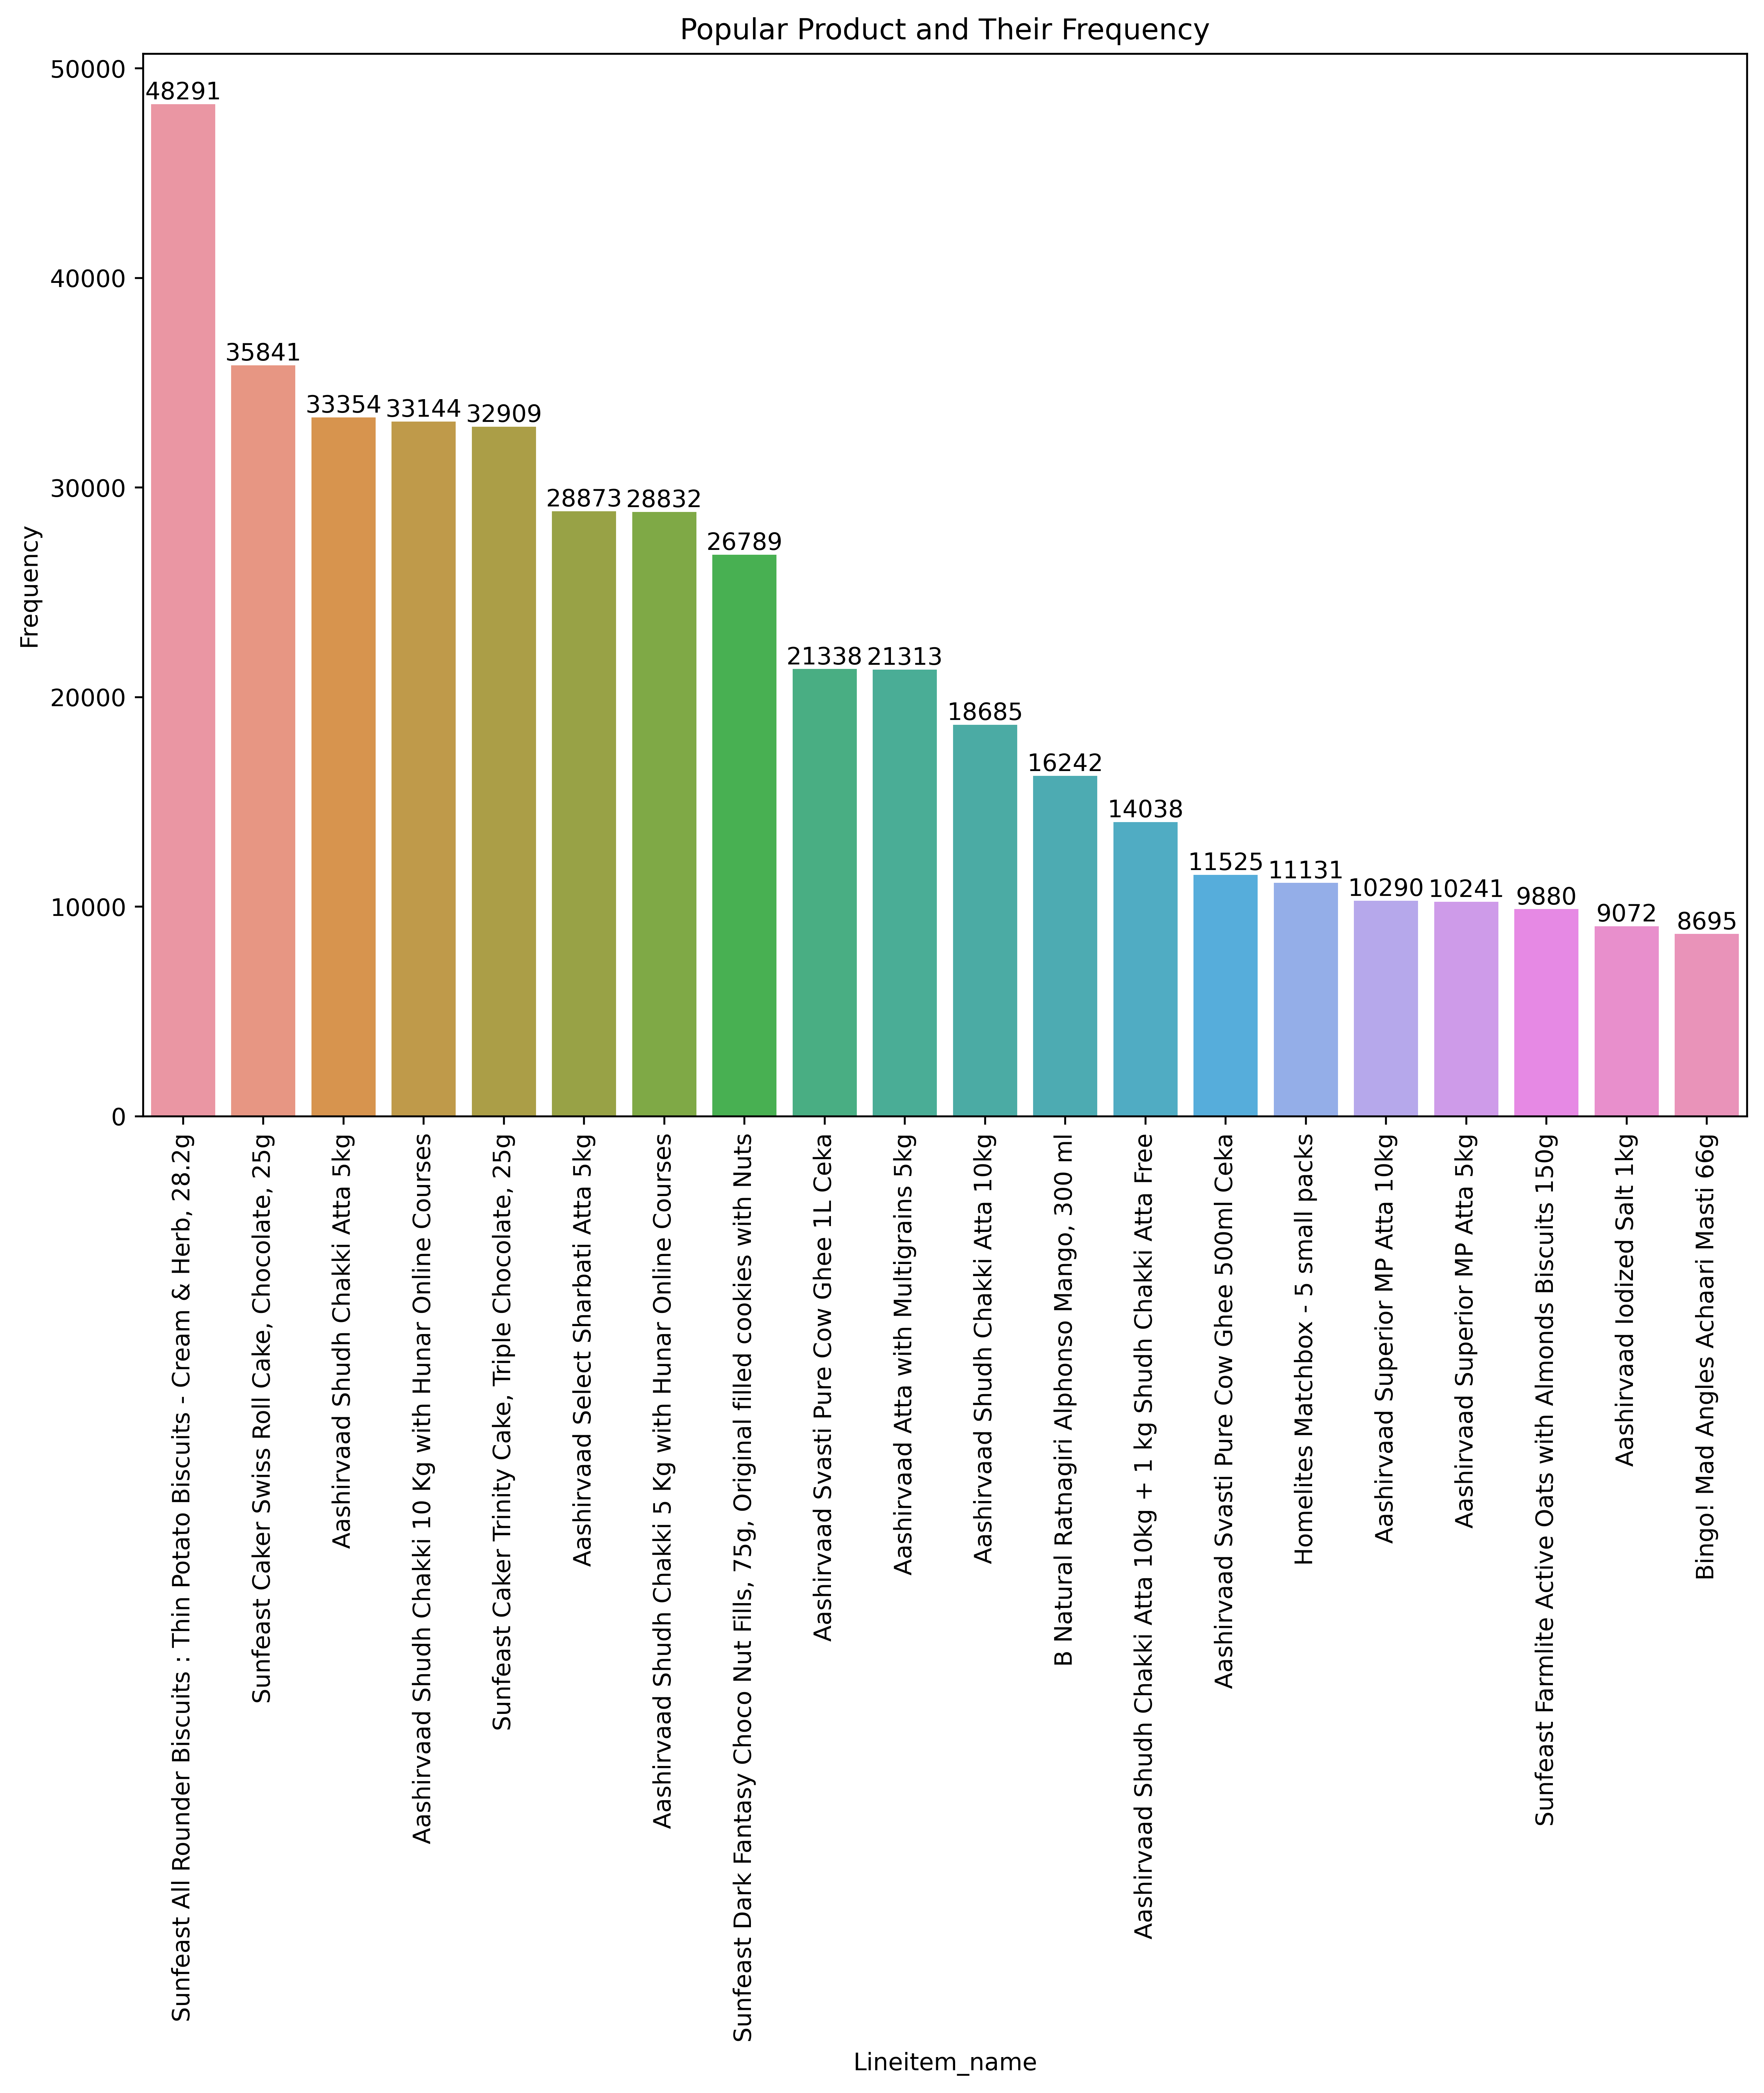

In [67]:
#most popular item and their frequencies

#getting the count of top 20 product
popular_product=merged_data['Lineitem_name'].value_counts().nlargest(20)
#converting to frame and resetting the index to plot the graph
popular_product=popular_product.to_frame()
popular_product.reset_index(inplace=True)
#renaming the columns
popular_product.rename(columns = {'index':'Lineitem_name', 'Lineitem_name':'Frequency',
                              }, inplace = True)
#plotting bar chart
%matplotlib inline
fig=plt.figure(figsize=(12,8),dpi=500)
plt.xticks(rotation=90)
plt.title('Popular Product and Their Frequency')
ax=sns.barplot(x='Lineitem_name', y='Frequency',data=popular_product)
sns.barplot(x='Lineitem_name', y='Frequency',data=popular_product,ax=ax)
ax.bar_label(ax.containers[0], labels=popular_product['Frequency'])
plt.show()


### Interpretation
#### From the chart above we see that ''Sunfeast All Rounder Biscuits : Thin Potato Biscuits - Cream & Herb' is the most loved product topping the table.

## Top 15 Customers with respect to Quantity of product brought 

C:\Users\kumar\AppData\Local\Temp\ipykernel_8588\562407804.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top15customers=merged_data.groupby(['customer_id']).sum()['Total_LI_Quantity'].nlargest(15).to_frame()


<AxesSubplot: title={'center': 'TOP 15 CUSTOMERS'}, xlabel='customer_id', ylabel='Total_LI_Quantity'>

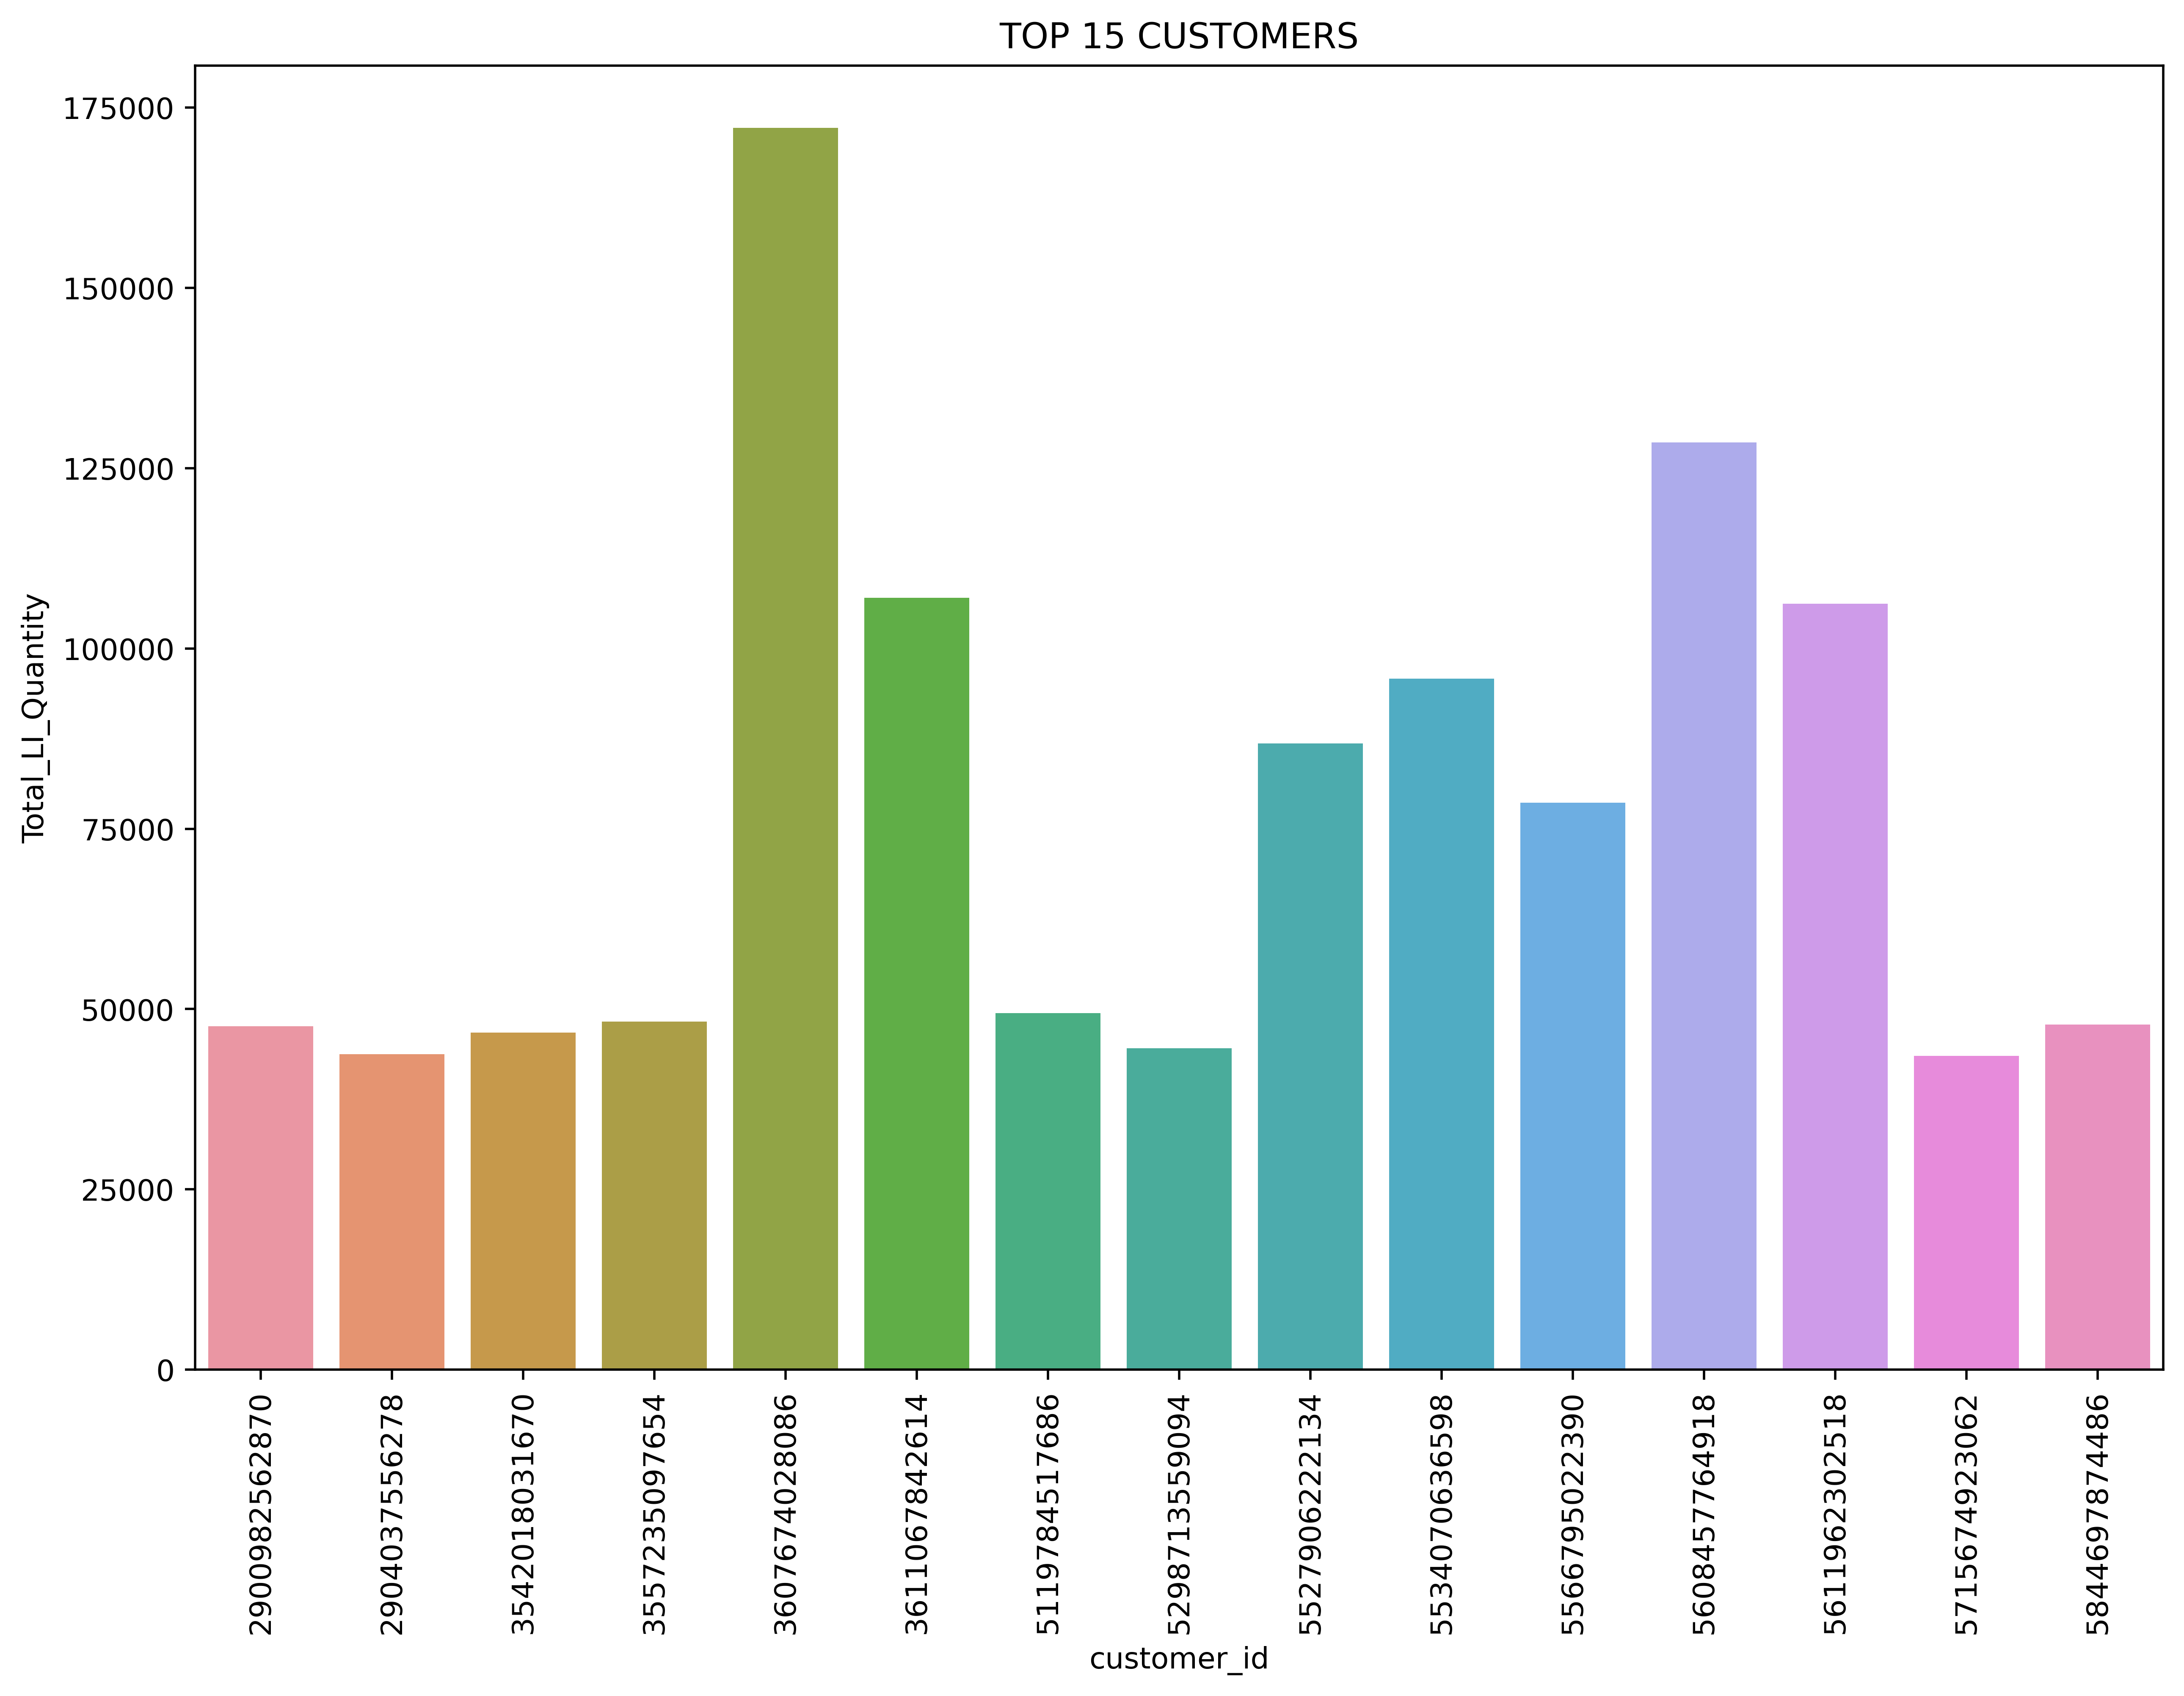

In [71]:
top15customers=merged_data.groupby(['customer_id']).sum()['Total_LI_Quantity'].nlargest(15).to_frame()
top15customers.reset_index(inplace=True)
%matplotlib inline
fig=plt.figure(figsize=(12,8),dpi=500)
plt.xticks(rotation='vertical')
plt.title('TOP 15 CUSTOMERS')
sns.barplot(x='customer_id', y='Total_LI_Quantity', data=top15customers)

### Interpretation
#### By the above graph we see that the customer with id 3607674028086 has brought the most number of products

## Analysis of purchasing behaviour and pattern  with respect to date and time 

In [73]:
#converting the columnto datetime 
merged_data['Created_at']=pd.to_datetime(merged_data['Created_at'])
merged_data['Created_at']=merged_data['Created_at'].dt.tz_localize(None)

In [74]:
#extracting the year ,month,day name,time and hour 
merged_data['year']= merged_data['Created_at'].dt.year
merged_data['month_name']=merged_data['Created_at'].dt.month_name()
merged_data['day_name']=merged_data['Created_at'].dt.day_name()
merged_data['time']=merged_data['Created_at'].dt.time
merged_data['hour']=merged_data['Created_at'].dt.hour

In [75]:
merged_data

,Order_Number,Created_at,Lineitem_quantity,Lineitem_name,Lineitem_price,Lineitem_sku,Vendor,Total_LI_price,Total_cart_value,Total_LI_Quantity,...,Division,Category,Brand,Pack Type,Product Mapping,year,month_name,day_name,time,hour
0,#518697,2022-07-19 13:46:35,1,Sunfeast All Rounder Biscuits : Thin Potato Bi...,10.0,SF AR CREAM&HERB10,Sunfeast All Rounder,1.0,1283.0,5,...,FOODS,Category_4,Brand-37,28.2 GM,REGULAR,2022,July,Tuesday,13:46:35,13
1,#518697,2022-07-19 13:46:35,2,Aashirvaad Shudh Chakki Atta 5kg,215.0,ASATTANMP5KG,Aashirvaad Atta,430.0,1283.0,5,...,FOODS,Category_31,Brand-1,5KG,REGULAR,2022,July,Tuesday,13:46:35,13
2,#518697,2022-07-19 13:46:35,2,Aashirvaad Shudh Chakki Atta 10kg,426.0,ASATTANMP10KG,Aashirvaad Atta,852.0,1283.0,5,...,FOODS,Category_31,Brand-1,10 KG,REGULAR,2022,July,Tuesday,13:46:35,13
3,#518696,2022-07-19 13:45:07,1,Sunfeast All Rounder Biscuits : Thin Potato Bi...,10.0,SF AR CREAM&HERB10,Sunfeast All Rounder,1.0,1005.0,7,...,FOODS,Category_4,Brand-37,28.2 GM,REGULAR,2022,July,Tuesday,13:45:07,13
4,#518696,2022-07-19 13:45:07,1,Homelites Matchbox - 1 Large Pack,10.0,HMLITESLARGE,Homelites,10.0,1005.0,7,...,MATCHES AND AGARBATTI,Category_21,Brand-20,1 PCS,REGULAR,2022,July,Tuesday,13:45:07,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328175,#640322,2023-05-01 00:13:47,1,YiPPee! Tricolor Pasta Corn 65g,28.0,TRICOLORCRCORN70G,Sunfeast YiPPee! Pasta,28.0,1025.0,59,...,FOODS,Category_23,Brand-37,65 GM,REGULAR,2023,May,Monday,00:13:47,0
1328176,#640322,2023-05-01 00:13:47,12,Bingo! Mad Angles Achaari Masti 66g,20.0,MAACHMASTIRS20,Bingo! Mad Angles,240.0,1025.0,59,...,FOODS,Category_29,Brand-3,72.5 GM,REGULAR,2023,May,Monday,00:13:47,0
1328177,#640322,2023-05-01 00:13:47,12,Bingo! Mad Angles Tomato Madness 66g,20.0,MATOMMADNESSRS20,Bingo! Mad Angles,240.0,1025.0,59,...,FOODS,Category_29,Brand-3,72.5 GM,REGULAR,2023,May,Monday,00:13:47,0
1328178,#640322,2023-05-01 00:13:47,12,Bingo! Tedhe Medhe Masala Tadka Rs.20,20.0,TM MASALA TADKA 30-PK,Bingo! Tedhe Medhe,240.0,1025.0,59,...,FOODS,Category_29,Brand-3,90 GM,REGULAR,2023,May,Monday,00:13:47,0


## Peak ordering hours

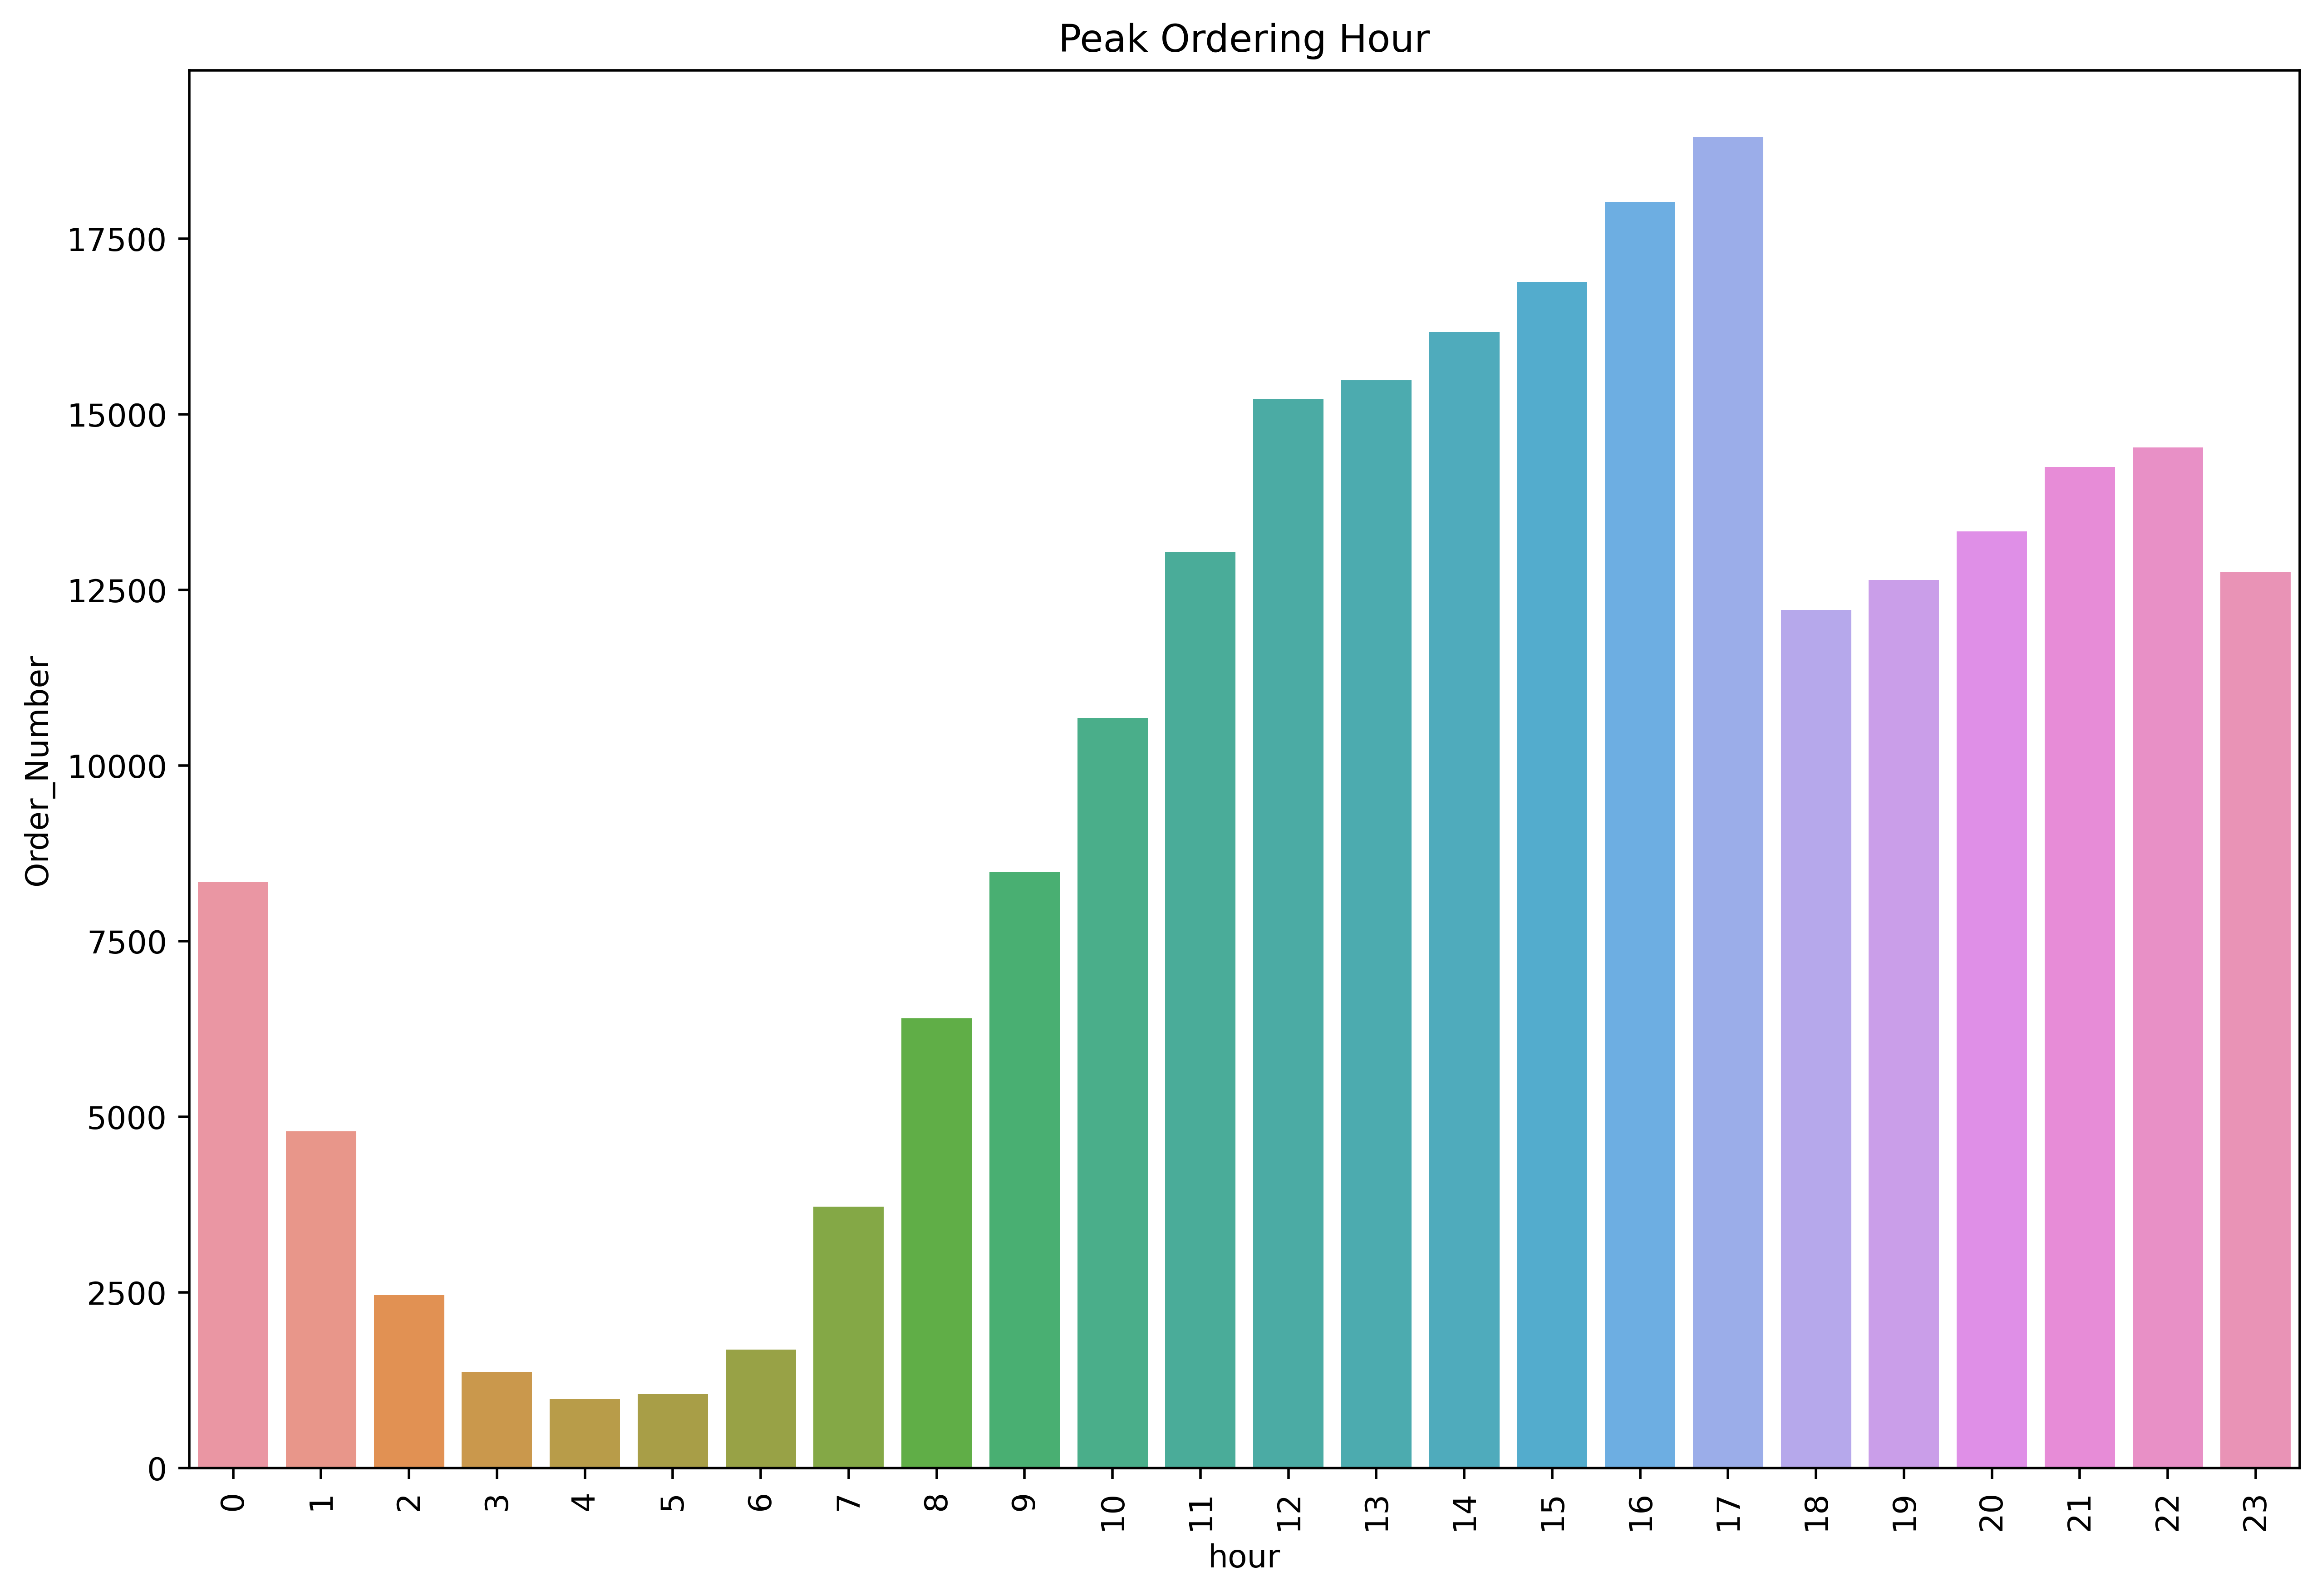

In [78]:
#dropping duplicate order column as the hours would replicate for each and every ordered item
ordering_hour=merged_data.drop_duplicates(subset='Order_Number', keep="first")
#grouping the number of orders with respect to hour of the day 
peak_ordering_hours=ordering_hour.groupby(['hour']).count()['Order_Number'].sort_values().to_frame()
#resetting the index
peak_ordering_hours.reset_index(inplace=True)

#plotting the graph
%matplotlib inline
fig=plt.figure(figsize=(12,8),dpi=500)
plt.xticks(rotation=90)
plt.title('Peak Ordering Hour')
plt.ylabel('Number_of_orders')
ax=sns.barplot(x='hour', y='Order_Number',data=peak_ordering_hours)
plt.show()

### Interpretation

#### By the above graph , we see that the customers are engaged maximum in the 18th hour which is 6 pm in the evening .
#### Orders are less in the day time and starts increasing in the afternoon and takes a peaks in the evening and again starts reducing.

# 2022 Analysis

## 2022 analysis with respect to sales

C:\Users\kumar\AppData\Local\Temp\ipykernel_8588\152837695.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_month_2022=cart_buster_droppped.groupby(['month_name']).sum()['total_sales'].to_frame()


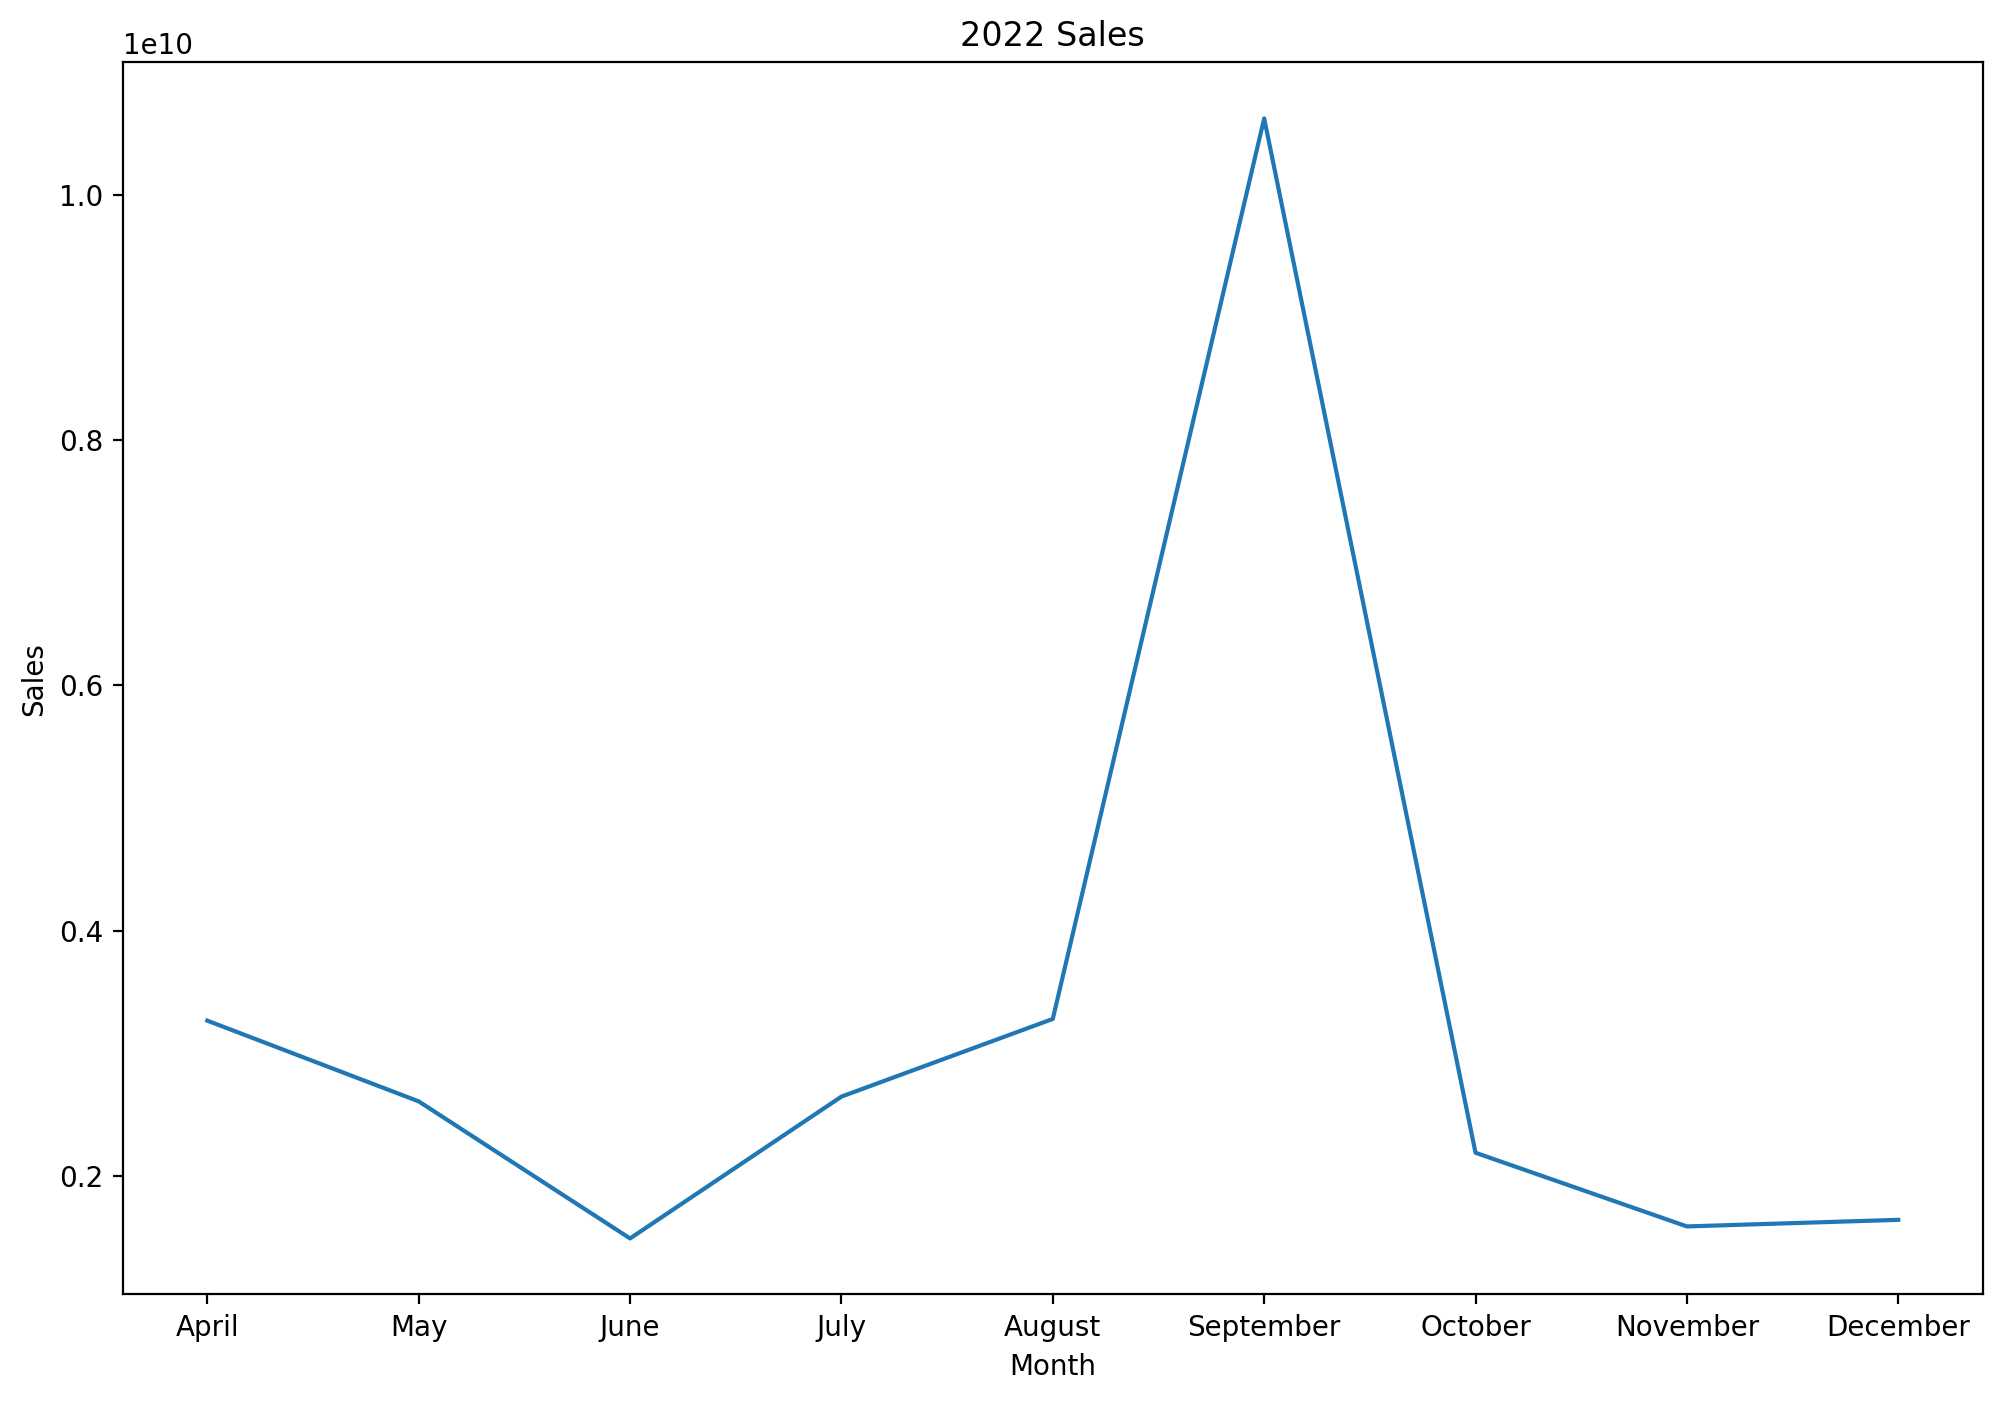

In [83]:
#creating a sales column in the data
merged_data["total_sales"]=merged_data['Total_LI_Quantity']*merged_data['Total_LI_price']
#dropping 2023 data 
data_2022=merged_data.drop(merged_data[merged_data['year']==2023].index)
#dropping cart buster items as it wont add up much to sales
cart_buster_droppped=data_2022.drop(data_2022[data_2022['Cart_Buster_Item']=='Cart_Buster'].index)
sales_month_2022=cart_buster_droppped.groupby(['month_name']).sum()['total_sales'].to_frame()
sales_month_2022.reset_index(inplace=True)
#creating a dictionary to arrange the month in orderly column
#note-the data present in 2022 contains information only from the month of April
#plotting a line graph
month_dict = {'April':1,'May':2,'June':3, 'July':4, 'August':5, 'September':6, 'October':7, 'November':8, 'December':9}
fig=plt.figure(figsize=(12,8),dpi=200)
sales_month_2022=sales_month_2022.sort_values('month_name', key = lambda x : x.apply (lambda x : month_dict[x]))
plt.plot(sales_month_2022["month_name"] ,sales_month_2022["total_sales"])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('2022 Sales')
plt.show()

### Interpretation

#### We see that the sales has topped at the month of september and the rest of the month remains to a medium level.

#### This tells  that the its store would have run any promotional offers during that month or it would have been a festive season. There would be various reasons where the sales took peak at this month. 

#### This tells us that customers buy items more when there are promotionals offers running,discounts provided or festive season.

## 2022 analysis with respect to number of orders

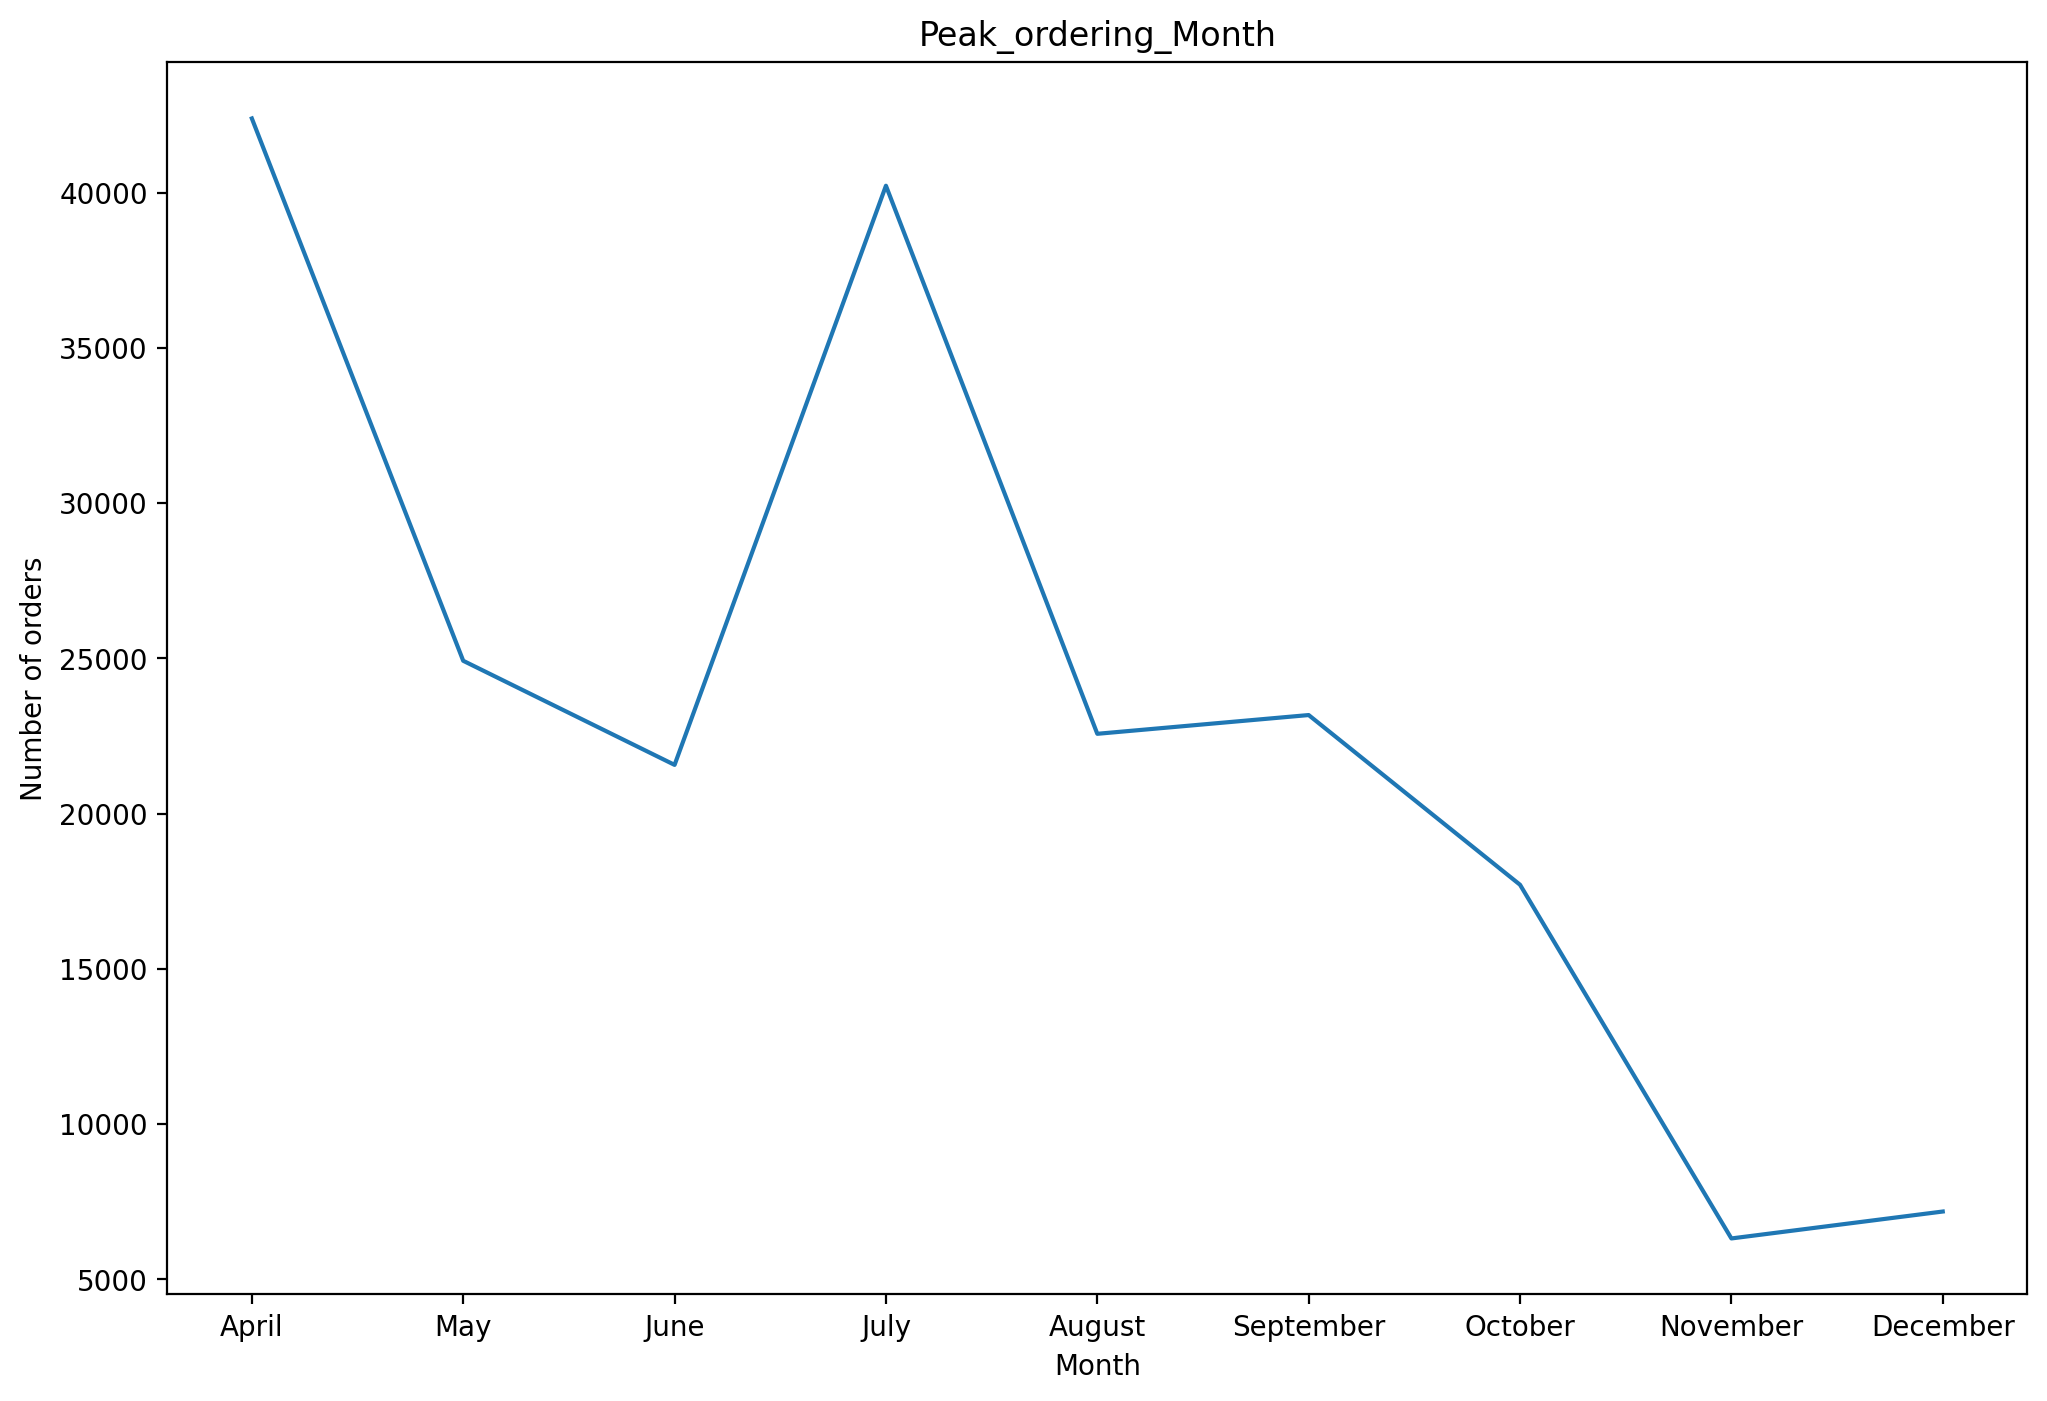

In [84]:
#dropping the duplicate order number as we need only one order number with respect to one basket 
data_2022_dropped_duplicate=data_2022.drop_duplicates(subset='Order_Number', keep="first")
#grouping order number cout with respect to month
peak_ordering_month_2022=data_2022_dropped_duplicate.groupby('month_name').count()['Order_Number'].to_frame()
peak_ordering_month_2022.reset_index(inplace=True)
#creating a dictionary to arrange the month in orderly column
month_dict = {'April':1,'May':2,'June':3, 'July':4, 'August':5, 'September':6, 'October':7, 'November':8, 'December':9}
#plotting line graph
fig=plt.figure(figsize=(12,8),dpi=200)
peak_ordering_month_2022=peak_ordering_month_2022.sort_values('month_name', key = lambda x : x.apply (lambda x : month_dict[x]))
plt.plot(peak_ordering_month_2022["month_name"] ,peak_ordering_month_2022["Order_Number"])
plt.xlabel('Month')
plt.ylabel('Number of orders')
plt.title('Peak_ordering_Month')
plt.show()

### Interpretation

#### We see that the orders were towards its peak at the month of April and drops gradually till the month of June. The order numbers takes a peak again at the month of July and and gradually drops down till December

#### This tells us much about the purchasing behaviour of customers. The number of orders would  have peaked the graph due to various reasons . From the month of July the orders drops gradually till December where November and December marks the lowest point in the graph. There might be various aspects pointing down to this reasons such as lack of stock , bad inventory management etc.

# 2023 Analysis

## 2023 Analysis with respect to sales

C:\Users\kumar\AppData\Local\Temp\ipykernel_8588\3067053244.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_month_2023=cart_buster_droppped2.groupby(['month_name']).sum()['total_sales'].to_frame()


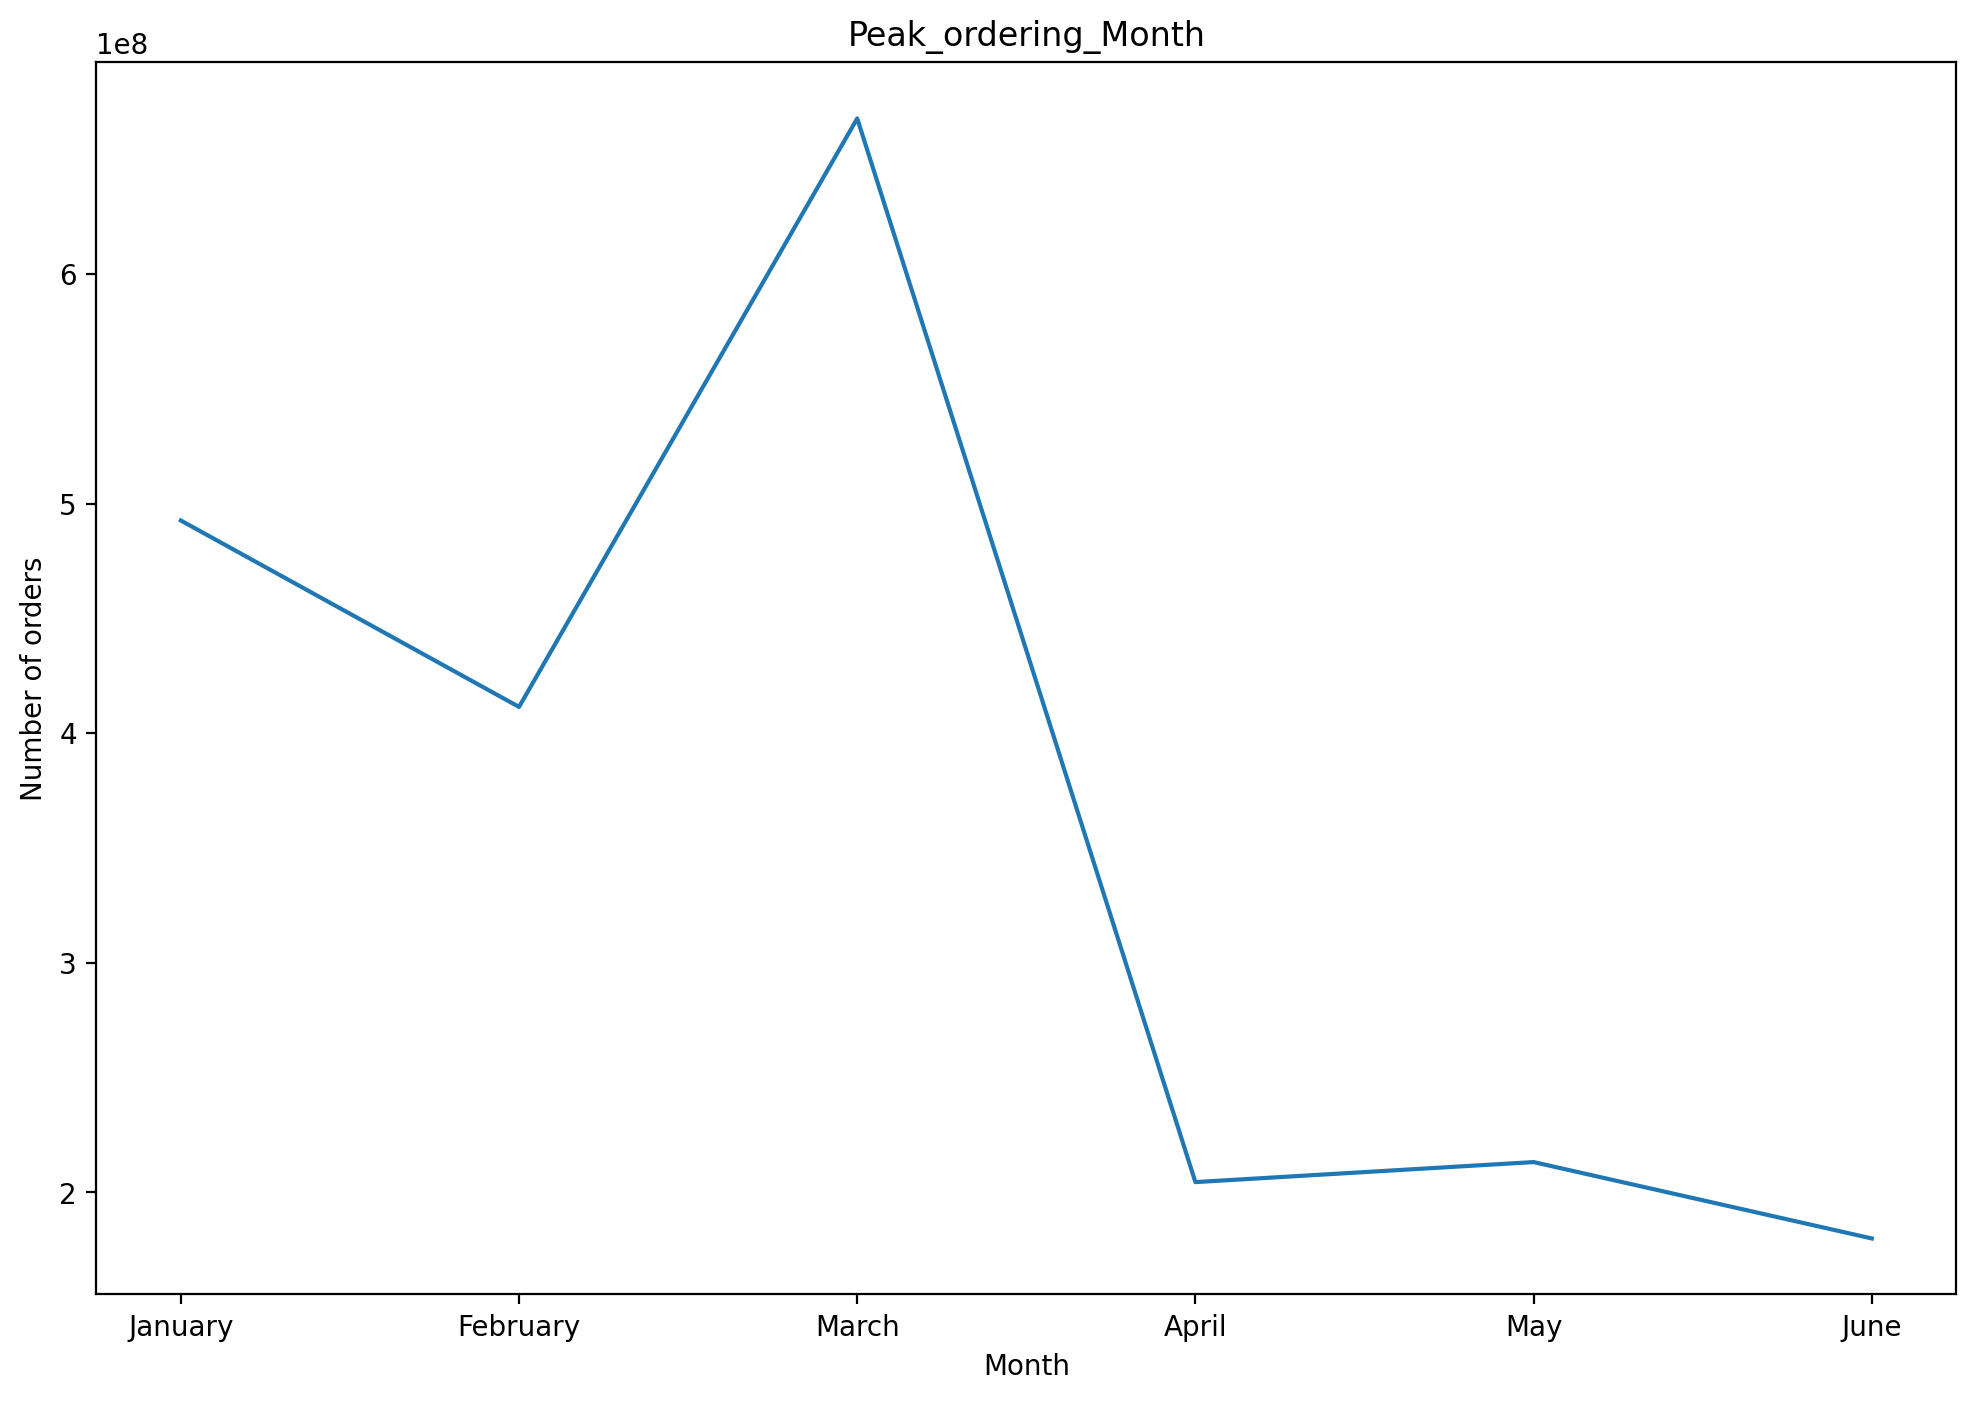

In [87]:
#creating a data frame that contains exclusively 2023 data
data_2023=merged_data[merged_data['year']==2023]
#dropping the cart burster items
cart_buster_droppped2=data_2023.drop(data_2023[data_2023['Cart_Buster_Item']=='Cart_Buster'].index)
#grouping the sum of total sales with respect to the month.
sales_month_2023=cart_buster_droppped2.groupby(['month_name']).sum()['total_sales'].to_frame()
sales_month_2023.reset_index(inplace=True)
#creating a dictionary to arrange the month in orderly column
#note-the data present in 2023 contains information only from the month od January to a june
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6}
#plotting the line graph
fig=plt.figure(figsize=(12,8),dpi=200)
sales_month_2023=sales_month_2023.sort_values('month_name', key = lambda x : x.apply (lambda x : month_dict[x]))
plt.plot(sales_month_2023["month_name"] ,sales_month_2023["total_sales"])
plt.xlabel('Month')
plt.ylabel('Number of orders')
plt.title('Peak_ordering_Month')
plt.show()

###  Interpretation

#### We see in the year 2023, the sales starts from the mid of the graph and peaks at the month of march and gradually drops down till the month of June.

#### This tells us much about the purchasing behaviour of customers. The sales would  have peaked the graph due to various reasons such as festive season, promotional offers,discount offers etc. 

#### From the month of March the sales abruptly drops down . There are several reason contributing to this . 

## 2023 Analysis with respect to Number of Orders

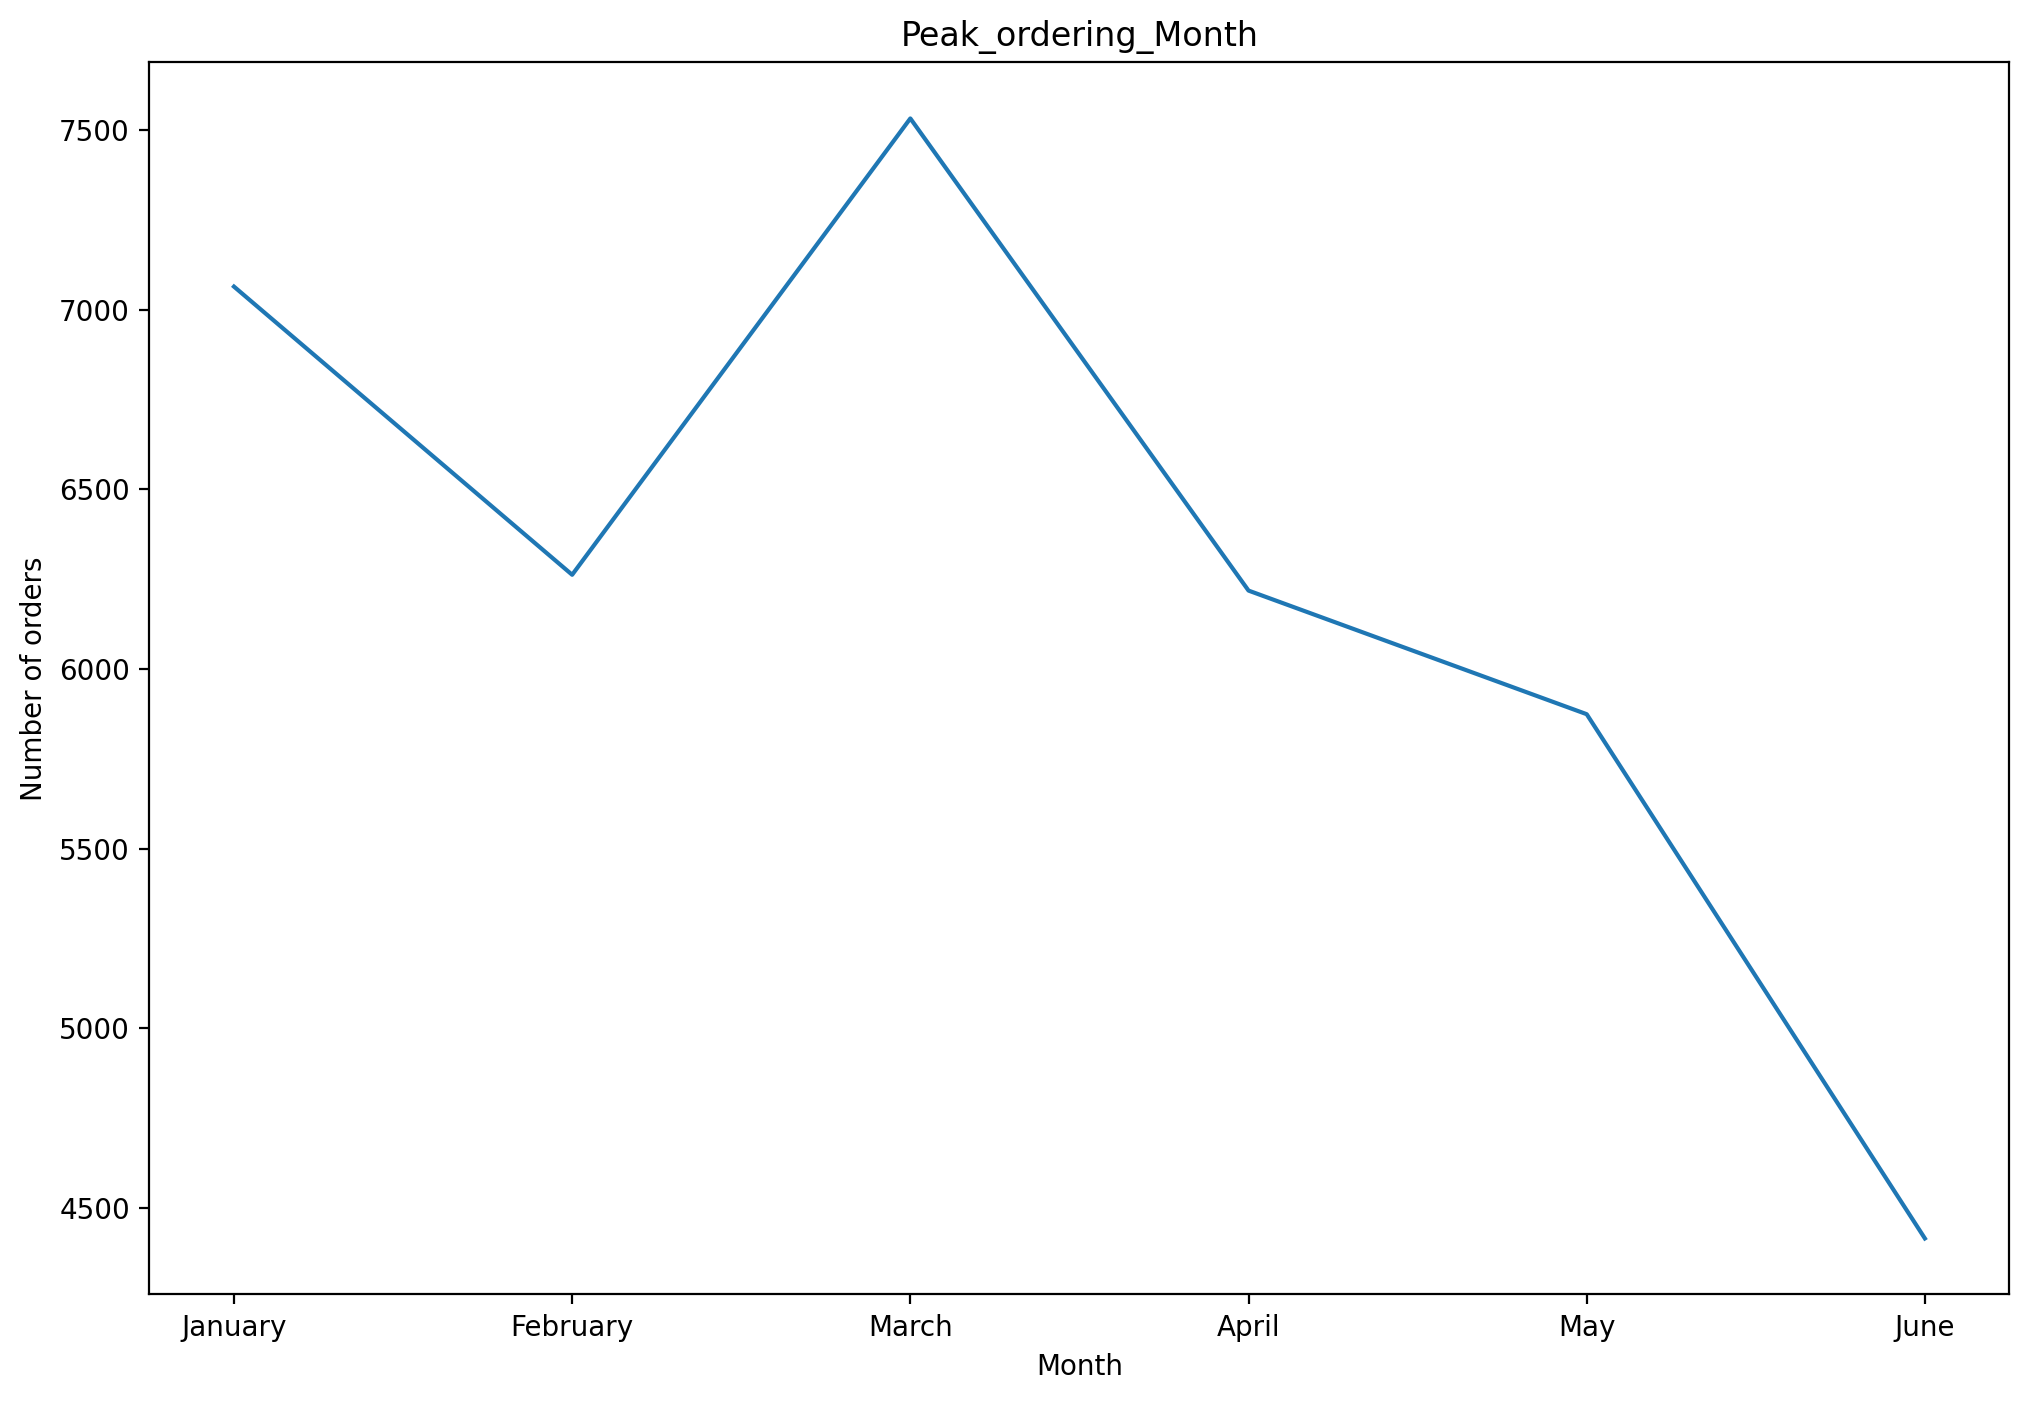

In [89]:
# dropping the duplicate order number as we need only one order number with respect to one basket 
data_2023_dropped_duplicate=data_2023.drop_duplicates(subset='Order_Number', keep="first")
# grouping by order_number sum count with respect to month
peak_ordering_month_2023=data_2023_dropped_duplicate.groupby('month_name').count()['Order_Number'].to_frame()
peak_ordering_month_2023.reset_index(inplace=True)
#creating a dictionary to arrange the month in orderly column
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6}
#PLotting the line graph
fig=plt.figure(figsize=(12,8),dpi=200)
peak_ordering_month_2023=peak_ordering_month_2023.sort_values('month_name', key = lambda x : x.apply (lambda x : month_dict[x]))
plt.plot(peak_ordering_month_2023["month_name"] ,peak_ordering_month_2023["Order_Number"])
plt.xlabel('Month')
plt.ylabel('Number of orders')
plt.title('Peak_ordering_Month')
plt.show()

### Interpretation

#### We observe a pattern here, the number of orders starts with a good amount at the month of January as drops to not much in the month of February and takes a peak at the month of March . After the peak , it gradually drop and is abruptly dropping down at the month of June.

#### There might be various reasons for the peak orders such as promotionals offers, massive discounts etc

# Percentage of items(product) purchased by customers with Respect of Division

Text(0.0, 1.0, 'Percentage of each Division')

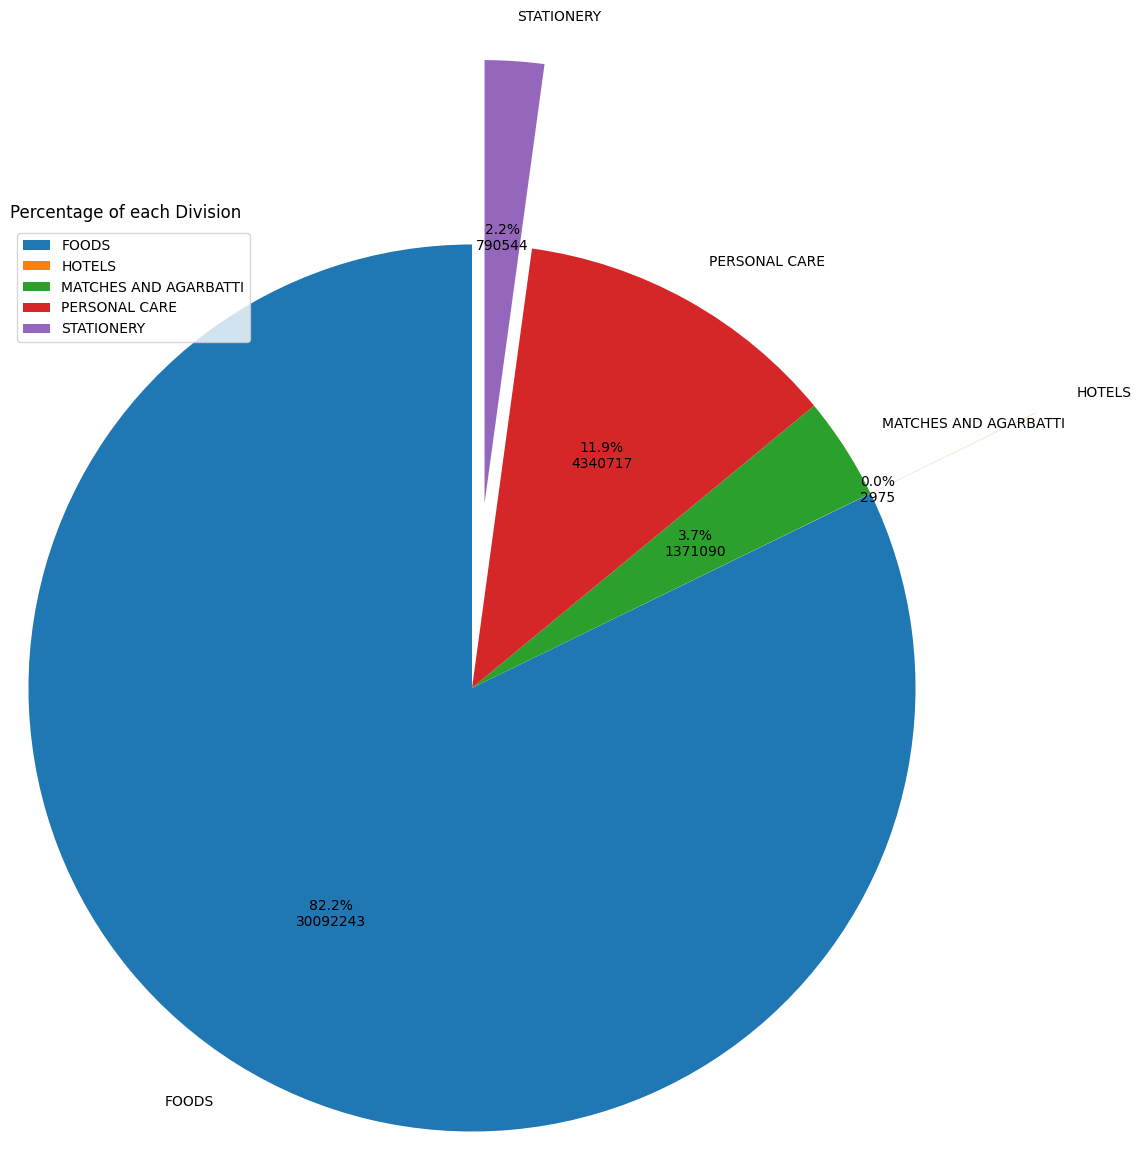

In [121]:
#creating a data frame of required columns
replicated_required=merged_data[['Order_Number','Total_LI_Quantity','Division']]
#replicating the rows to the number of quantity as every unit contributes to the purchase
replicated_division=pd.DataFrame(np.repeat(replicated_required.values,replicated_required['Total_LI_Quantity'].values,axis=0))
replicated_division.columns =replicated_required.columns
#grouping to the count of orders with respect to division
division=replicated_division.groupby('Division').count()['Order_Number'].to_frame()
division.reset_index(inplace=True)
#Creating a function to calculate the percentage
total = division['Order_Number'].sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)
#Plotting the pie chart
fig1 = plt.figure(figsize=(12,12))
plt.pie(division['Order_Number'], labels=division['Division'], autopct=fmt,
         startangle=90, radius=1.2,explode=(0,0.5,0,0,0.5))

plt.legend()
plt.title("Percentage of each Division",loc='left')

### Results

#### Food division contributes to the most number of purchase . This contributes maximum to the sales which is obvious.

#### The market reputation and consumer franchise of ITC's well-known brands, like Aashirvaad and Bingo!, have helped this division of the company's packaged food division develop at one of the quickest rates among food firms in India.


#  Percentage of items(product) purchased by customers with Respect of Category

Text(0.5, 1.0, 'Percentage of item purchased with respect to category')

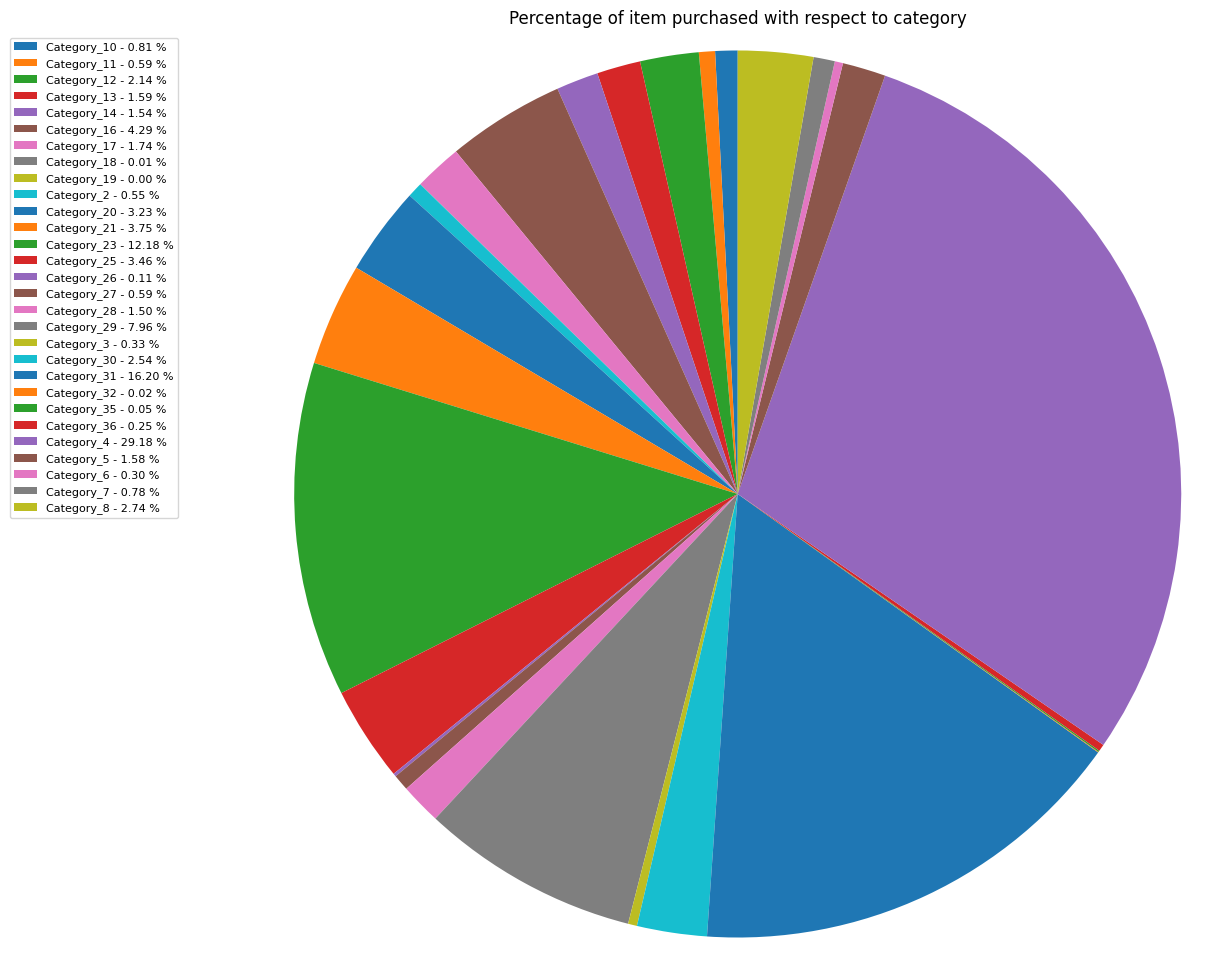

In [122]:
#creating a data frame of required columns
replicated_required2=merged_data[['Order_Number','Total_LI_Quantity','Category']]
#replicating the rows to the number of quantity as every unit contributes to the purchase
replicated_category=pd.DataFrame(np.repeat(replicated_required2.values,replicated_required2['Total_LI_Quantity'].values,axis=0))
replicated_category.columns =replicated_required2.columns
category=replicated_category.groupby('Category').count()['Order_Number'].to_frame()
category.reset_index(inplace=True)
#calculating the percentage
total = category['Order_Number'].sum()
percent = 100.*category.Order_Number/category.Order_Number.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)
#plotting the pie chart
plt.figure(figsize=(12, 12))
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(category.Category, percent)]


plt.pie(category['Order_Number'],startangle=90, radius=1.2)
plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=8)
plt.title('Percentage of item purchased with respect to category')

### Result

#### Category_4 tops with the most number of items purchased with 29.18% followed by Category_31 with 16.20%

Further information was required to see the items present in the category for better understanding

## Grouping the data to check the number of orders with sub level group of Division and Category

In [127]:
replicated_required3=merged_data[['Order_Number','Total_LI_Quantity','Division','Category','Brand']]
replicated_form=pd.DataFrame(np.repeat(replicated_required3.values,replicated_required3['Total_LI_Quantity'].values,axis=0))
replicated_form.columns =replicated_required3.columns
replicated_form.groupby(['Division','Category']).count()['Order_Number'].to_frame()

Order_Number
Division              Category                 
FOODS                 Category_16       1571652
                      Category_19             7
                      Category_20       1180579
                      Category_23       4458892
                      Category_25       1265908
                      Category_29       2913048
                      Category_3         119823
                      Category_31       5929892
                      Category_4       10679686
                      Category_5         576497
                      Category_6         109613
                      Category_7         284514
                      Category_8        1002133
HOTELS                Category_18          2975
MATCHES AND AGARBATTI Category_21       1371090
PERSONAL CARE         Category_10        297508
                      Category_11        214703
                      Category_13        582147
                      Category_14        562248
                      Category_17        635075
                      Category_2         202295
                      Category_26         40983
                      Category_27        215841
                      Category_28        547311
                      Category_30        931375
                      Category_35         18113
                      Category_36         93118
STATIONERY            Category_12        781634
                      Category_32          8910

### Result

#### As we saw in the previous graph that Food tops the most number of purchase so it is obvious that the categories under the food division also maximizes the purchase.

#### How ever we see again that category_4 tops under the food division and category_19 the least. Personal care tops the next with Category_30 as the highest.

#### Other division contributes mininal to the number of purchases

#### Lets analyse the above tabel in the form of bar plot

Text(0, 0.5, 'Number of Purchases')

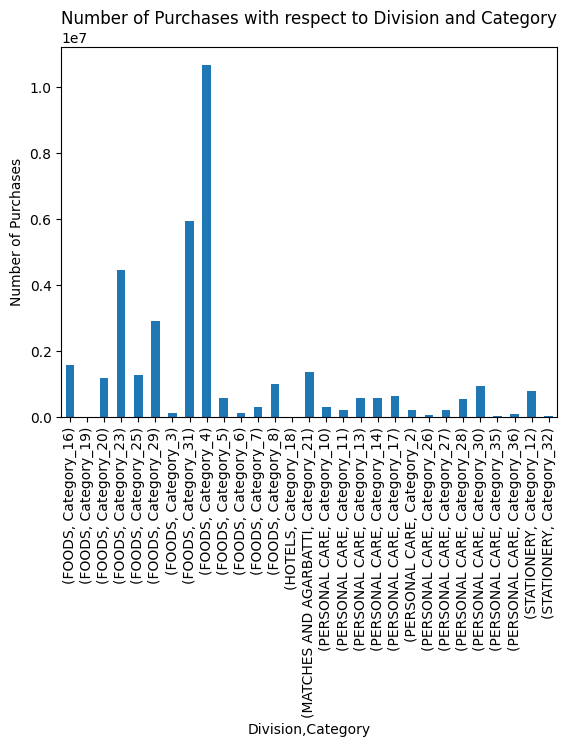

In [130]:
replicated_form.groupby(['Division','Category']).count()['Order_Number'].plot(kind='bar')
plt.title('Number of Purchases with respect to Division and Category')
plt.ylabel('Number of Purchases')

### Result

#### Food division of Category _4 tops the purchase followed by Category_31

## Barplot for total sales with respect to Division and Category

Text(0, 0.5, 'Sales')

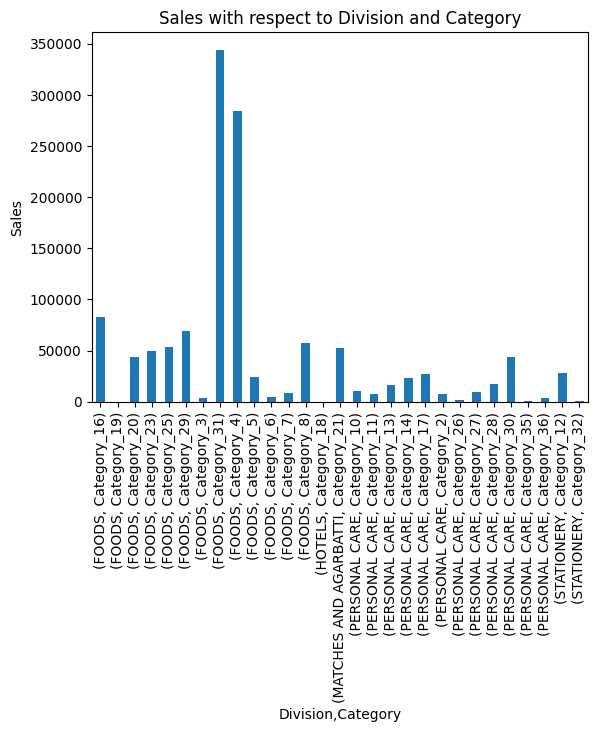

In [131]:
sales_division_category=merged_data[['Order_Number','Total_LI_Quantity','Division','Category','Brand','total_sales']]
sales_division_category.groupby(['Division','Category']).count()['total_sales'].plot(kind='bar')
plt.title('Sales with respect to Division and Category')
plt.ylabel('Sales')

### Result

#### As we again observe the same trend. Food division of category 31 and 4 contributes maximum to the sale. This is quiet obvious as they are the most number of items purchased by customers.

# top 10 product that contribute to sales with respect to brand and product

C:\Users\kumar\AppData\Local\Temp\ipykernel_8588\2776234164.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_data.groupby('Lineitem name').sum()['total_sales'].nlargest(10).plot(kind='bar')


Text(0, 0.5, 'Sales')

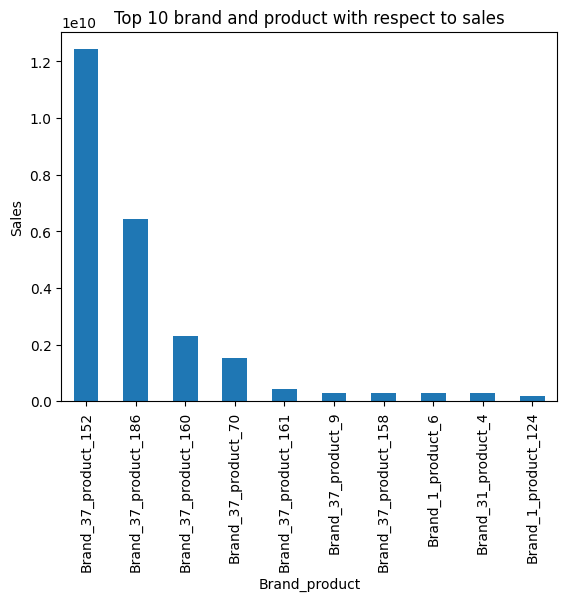

In [132]:
merged_data.groupby('Lineitem name').sum()['total_sales'].nlargest(10).plot(kind='bar')
plt.title('Top 10 brand and product with respect to sales')
plt.xlabel('Brand_product')
plt.ylabel('Sales')

### Results

#### brand 37 product 152 contribute maximum to the sales followed by brand 37 product 186. It is obvious that these are purchased more in number.

### Exporting the merged data frame to csv to perform market basket analysis(Association rule)

In [136]:
merged_data.to_csv('Merged_data_file.csv')